GMREDI Hydrostatic run13
===================================================

360x360x90x8Tr_LinProfiles_BarkleyHyd_GMREDI/run13
--------------------------------------------------------------

isopyc=1

In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl



In [2]:
def unstagger(ugrid, vgrid):
    """Interpolate u and v component values to values at grid cell centres.

    The shapes of the returned arrays are 1 less than those of
    the input arrays in the y and x dimensions.

    :arg ugrid: u velocity component values with axes (..., y, x)
    :type ugrid: :py:class:`numpy.ndarray`

    :arg vgrid: v velocity component values with axes (..., y, x)
    :type vgrid: :py:class:`numpy.ndarray`

    :returns u, v: u and v component values at grid cell centres
    :rtype: 2-tuple of :py:class:`numpy.ndarray`
    """
    u = np.add(ugrid[..., :-1], ugrid[..., 1:]) / 2
    v = np.add(vgrid[..., :-1, :], vgrid[..., 1:, :]) / 2
    return u[..., 1:, :], v[..., 1:]


In [3]:
# Get field from MITgcm netCDF output
#
''' :statefile : string with /path/to/state.0000000000.t001.nc
    :fieldname : string with the variable name as written on the netCDF file ('Temp', 'S','Eta', etc.)'''

def getField(statefile, fieldname):
    
    StateOut = Dataset(statefile)
    
    Fld = StateOut.variables[fieldname][:]
    
    shFld = np.shape(Fld)
    
        
    if len(shFld) == 2:
        
        Fld2 = np.reshape(Fld,(shFld[0],shFld[1])) # reshape to pcolor order
        return Fld2 
    
    elif len(shFld) == 3:
        
        Fld2 = np.zeros((shFld[0],shFld[1],shFld[2])) 
        Fld2 = np.reshape(Fld,(shFld[0],shFld[1],shFld[2])) # reshape to pcolor order
        return Fld2
        
    elif len(shFld) == 4:
        
        Fld2 = np.zeros((shFld[0],shFld[1],shFld[2],shFld[3])) 
        Fld2 = np.reshape(Fld,(shFld[0],shFld[1],shFld[2],shFld[3])) # reshape to pcolor order
        return Fld2
        
    else:
        
        print (' Check size of field ')
    
    



Inquire variable from NetCDF -  RUN13

In [61]:
filename='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/state.0000000000.glob.nc'
StateOut = Dataset(filename)

#for dimobj in StateOut.variables.values():
#    print dimobj


filename2='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/grid.glob.nc'
GridOut = Dataset(filename2)

#for dimobj in GridOut.variables.values():
#    print dimobj


filename3='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/ptracers.0000000000.glob.nc'
PtracersOut = Dataset(filename3)

#for dimobj in PtracersOut.variables.values():
#    print dimobj


In [62]:
# General input

nx = 360
ny = 360
nz = 90

nt = 19 # t dimension size 

z = StateOut.variables['Z']
print(z[10])
Time = StateOut.variables['T']
#print(Time[:])

xc = getField(filename2, 'XC') # x coords tracer cells

yc = getField(filename2, 'YC') # y coords tracer cells

bathy = getField(filename2, 'Depth')

-52.5


In [6]:
zlev = 15             # level 34 corresponds to  162.5m , near shelf break

timesc = np.arange(0,len(Time),2)   # These correspond to each day




In [7]:
ugrid = getField(filename,'U')
vgrid = getField(filename,'V')

print(np.shape(ugrid))
print(np.shape(vgrid))



(19, 90, 360, 360)
(19, 90, 360, 360)


Get mask from T field (not the best, I know)

In [8]:
temp = getField(filename, 'Temp')

temp0 = np.ma.masked_values(temp, 0)

MASK = np.ma.getmask(temp0)


# Nice cell center mask
hFacC = getField(filename2,'HFacC') #(90,360,360)

hFacCmasked = np.ma.masked_values(hFacC, 0)

MASKhFacC = np.ma.getmask(hFacCmasked)

# Nice cell open side mask
hFacW = getField(filename2,'HFacW') #(90,360,360)

hFacWmasked = np.ma.masked_values(hFacW, 0)

MASKhFacW = np.ma.getmask(hFacWmasked)

# Nice cell ? mask
hFacS = getField(filename2,'HFacS') #(90,360,360)

hFacSmasked = np.ma.masked_values(hFacS, 0)

MASKhFacS = np.ma.getmask(hFacSmasked)

In [9]:
#### T controls for plot ####

plt.rcParams.update({'font.size':13})

colorsTemp = [(245.0/255.0,245/255.0,245./255.0), (255/255.0,20/255.0,0)] #(khaki 1246/255.0,143./255.0  ,orangered2)

posTemp = [0, 1] 
 
NumLev = 30 # number of levels for contour



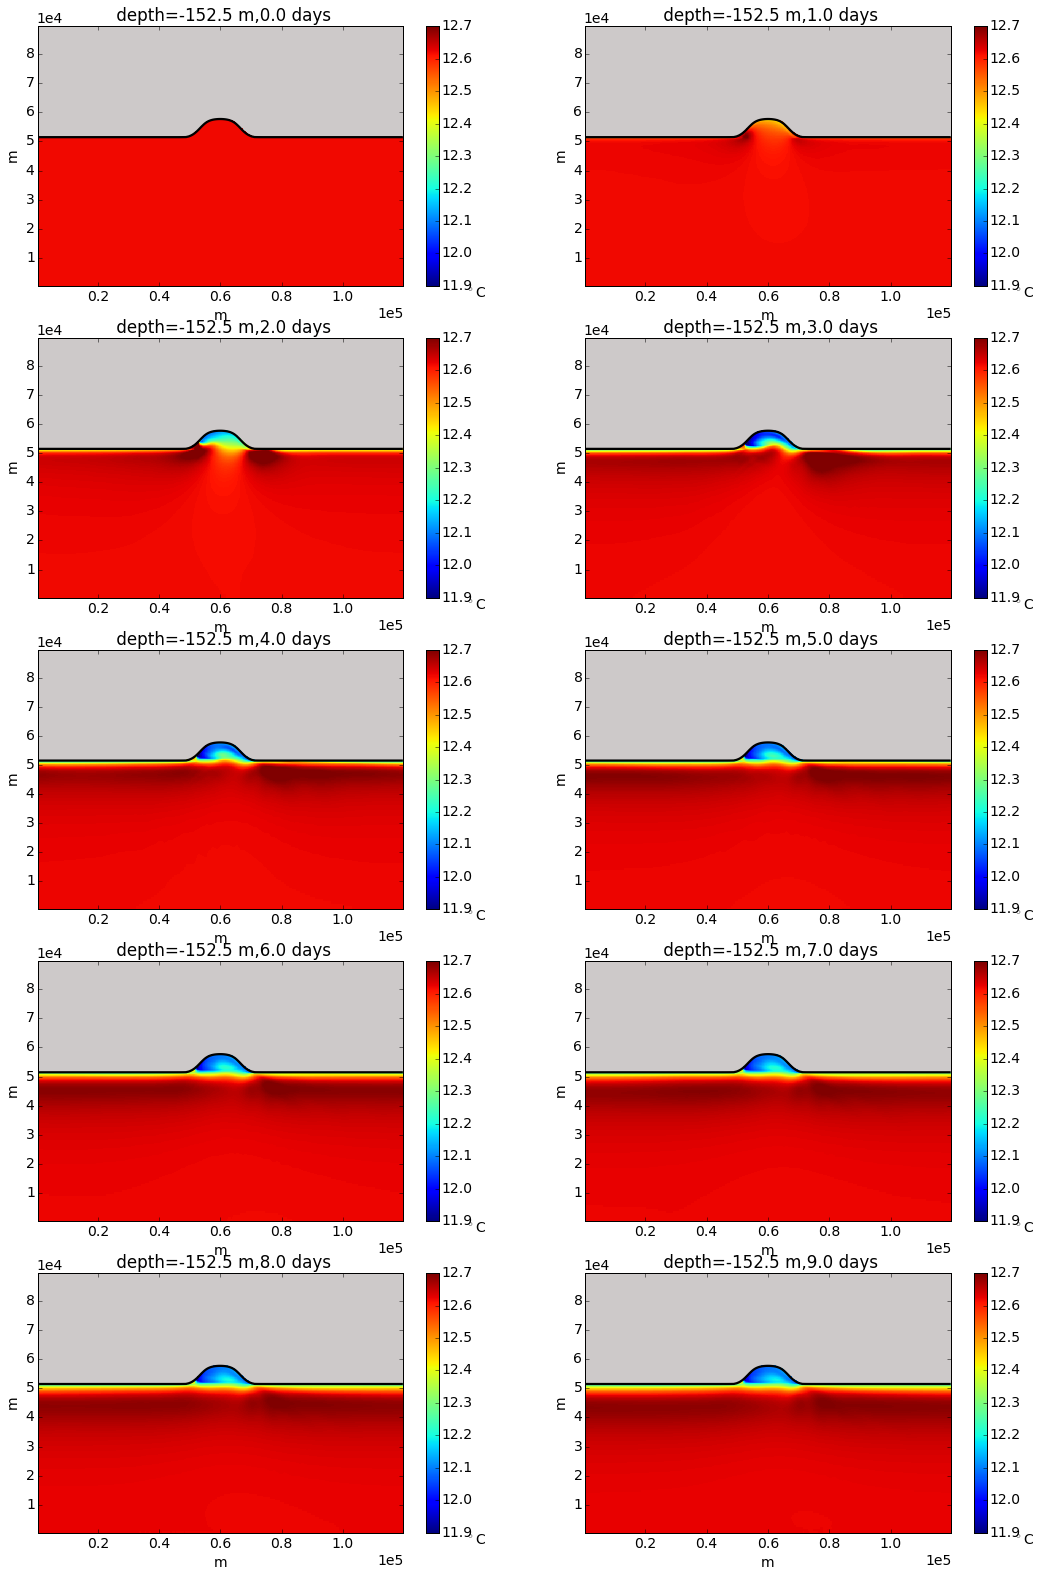

In [10]:
####  PLOT ####
zlev=30
plt.rcParams.update({'font.size':14})

kk=1

fig45=plt.figure(figsize=(18,27))

for tt in range(0,19,2) :
        
        ### Temperature run01
        plt.subplot(5,2,kk)
        
        ax = plt.gca()
        CS = plt.contour(xc,yc,bathy,[150],colors='k',linewidths=[2.25] )
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        #plt.contourf(xc,yc,temp0[tt,zlev,:,:],NumLev)#,cmap=make_cmap(colorsTemp, position=posTemp))
        plt.pcolor(xc,yc,temp0[tt,zlev,:,:])
        pl.clim([11.9,12.7])
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
        plt.xlabel('m')
        plt.ylabel('m')
        
        cb = plt.colorbar()
        
        cb.set_label(r'$^{\circ}$C',position=(1, 0),rotation=0)
       
        plt.title(" depth=%1.1f m,%1.1f days " % (z[zlev],tt/2.))
        
        kk=kk+1
        

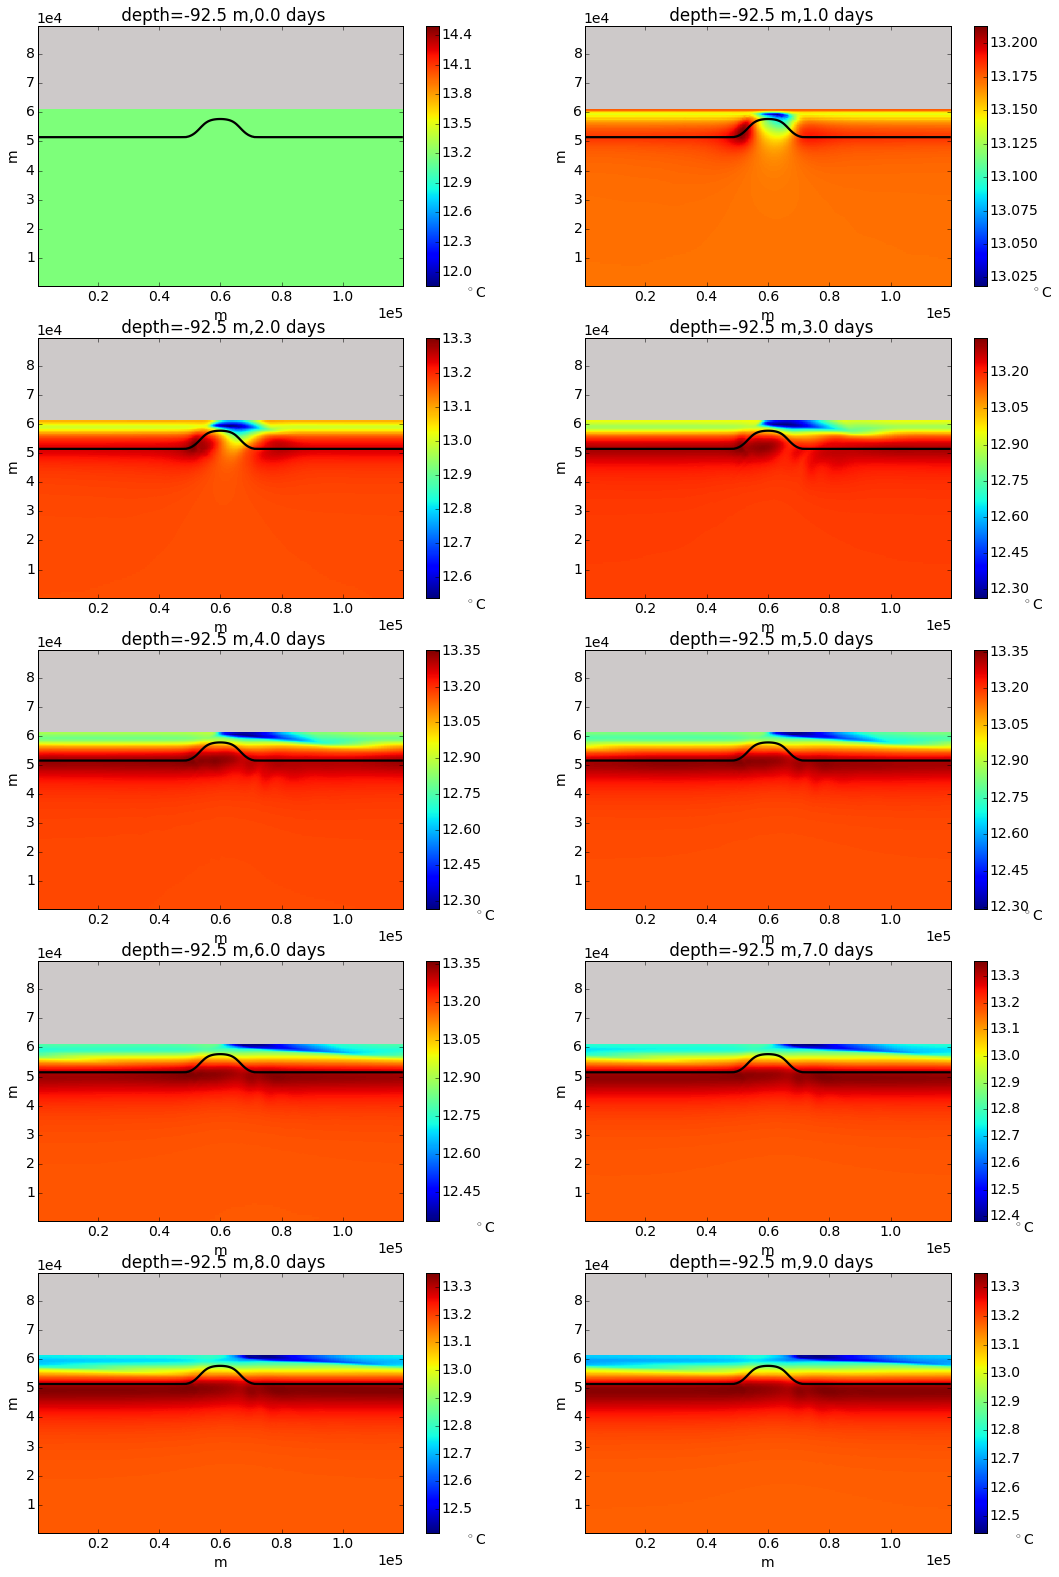

In [105]:
####  PLOT ####
zlev=18
plt.rcParams.update({'font.size':14})

kk=1

fig45=plt.figure(figsize=(18,27))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Temperature run01
        plt.subplot(5,2,kk)
        
        ax = plt.gca()
        CS = plt.contour(xc,yc,bathy,[150],colors='k',linewidths=[2.25] )
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        #plt.contourf(xc,yc,temp0[tt,zlev,:,:],NumLev)#,cmap=make_cmap(colorsTemp, position=posTemp))
        plt.pcolor(xc,yc,temp0[tt,zlev,:,:])
        #pl.clim([13.10,13.7])
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
        plt.xlabel('m')
        plt.ylabel('m')
        
        cb = plt.colorbar()
        
        cb.set_label(r'$^{\circ}$C',position=(1, 0),rotation=0)
       
        plt.title(" depth=%1.1f m,%1.1f days " % (z[zlev],tt/2.))
        
        kk=kk+1
        

Unstagger all depths of u and v (this will be useful later when plotting cross-sections)

In [64]:
u2,v2 = unstagger(ugrid,vgrid)

print(np.shape(u2))
print(np.shape(v2))



(19, 90, 359, 359)
(19, 90, 359, 359)


Velocity plots

/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:625: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:625: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:681: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:691: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


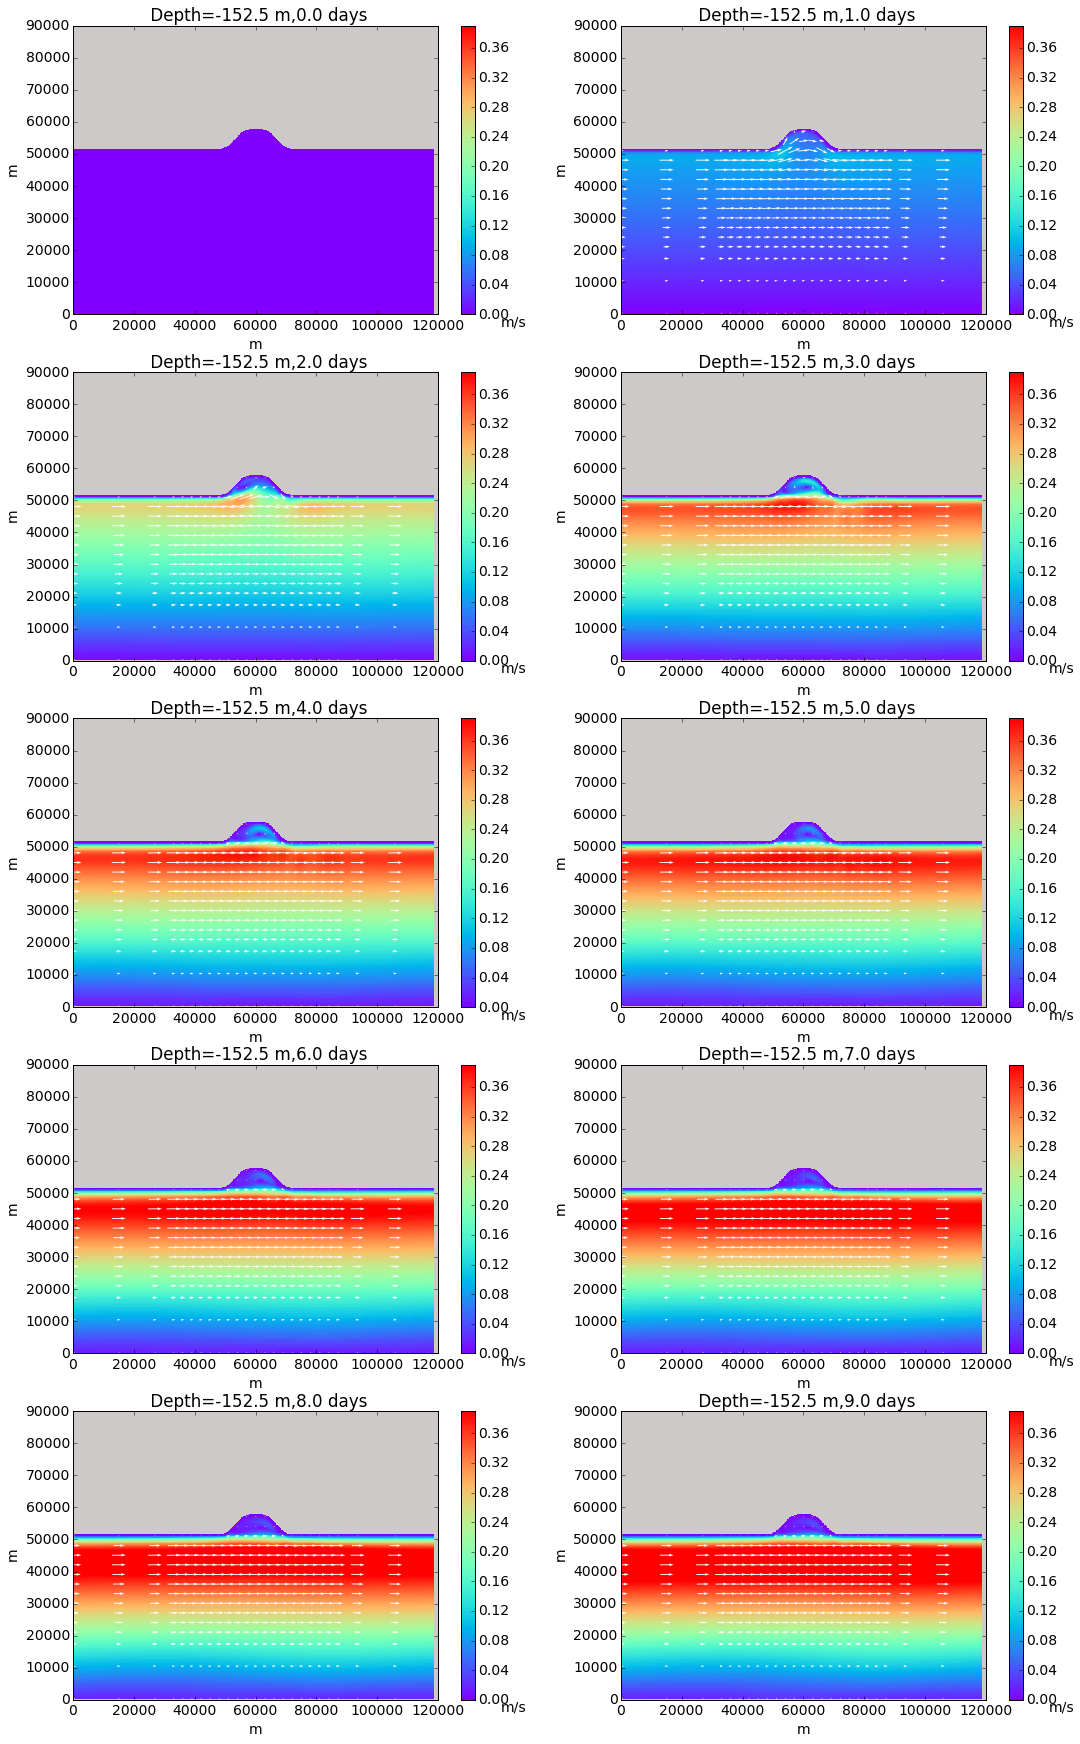

In [13]:
####  PLOT ####
zlev=30
plt.rcParams.update({'font.size':14})

kk=1

fig46=plt.figure(figsize=(18,30))


for tt in range(0,19,2) :
        
        ### Speed and vel vectors, run01
        
        plt.subplot(5,2,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

        umask=np.ma.array(u2[tt,zlev,:,:],mask=MASKhFacC[zlev,:-1,:-1])
        vmask=np.ma.array(v2[tt,zlev,:,:],mask=MASKhFacC[zlev,:-1,:-1])
        
        y_slice = yc[:]#np.arange(0, ny-1)
        x_slice = xc[:]#np.arange(0, nx-1)
        
        arrow_step = 15
        y_slice_a = y_slice[::arrow_step,::arrow_step]
        x_slice_a = x_slice[::arrow_step,::arrow_step]
        
        Usliceb = umask[::arrow_step,::arrow_step]
        Vsliceb = vmask[::arrow_step,::arrow_step]
        
        #print(np.shape(Uslice))
        #print(np.shape(Vslice))
        #print(np.shape(x_slice_a))
        #print(np.shape(y_slice_a))
        
        spd = np.sqrt(umask**2 + vmask**2)
        
        
        pos = [0, 1] # to keep white color on zero
        
        #colorsSpd = [(245.0/255.0,245/255.0,245./255.0), (71./255.0,60.0/255.0,139.0/255.0)] #(white-ish, Slate blue 4)
        
        #plt.contourf(xc[:-1,:-1],yc[:-1,:-1],spdb,NumLev,cmap=make_cmap(colorsSpd, position=pos))
        plt.pcolor(xc[:-1,:-1],yc[:-1,:-1],spd,cmap='rainbow')
        pl.clim([0,0.39])
        cb = plt.colorbar()
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        
        plt.quiver(x_slice_a,y_slice_a,Usliceb,Vsliceb,pivot='middle',color='w' ,)
        
        plt.xlabel('m')
        
        plt.ylabel('m')
        
        plt.title(" Depth=%1.1f m,%1.1f days " % (z[zlev],tt/2.0))
        
        kk=kk+1



Along-shelf velocity along canyon axis:

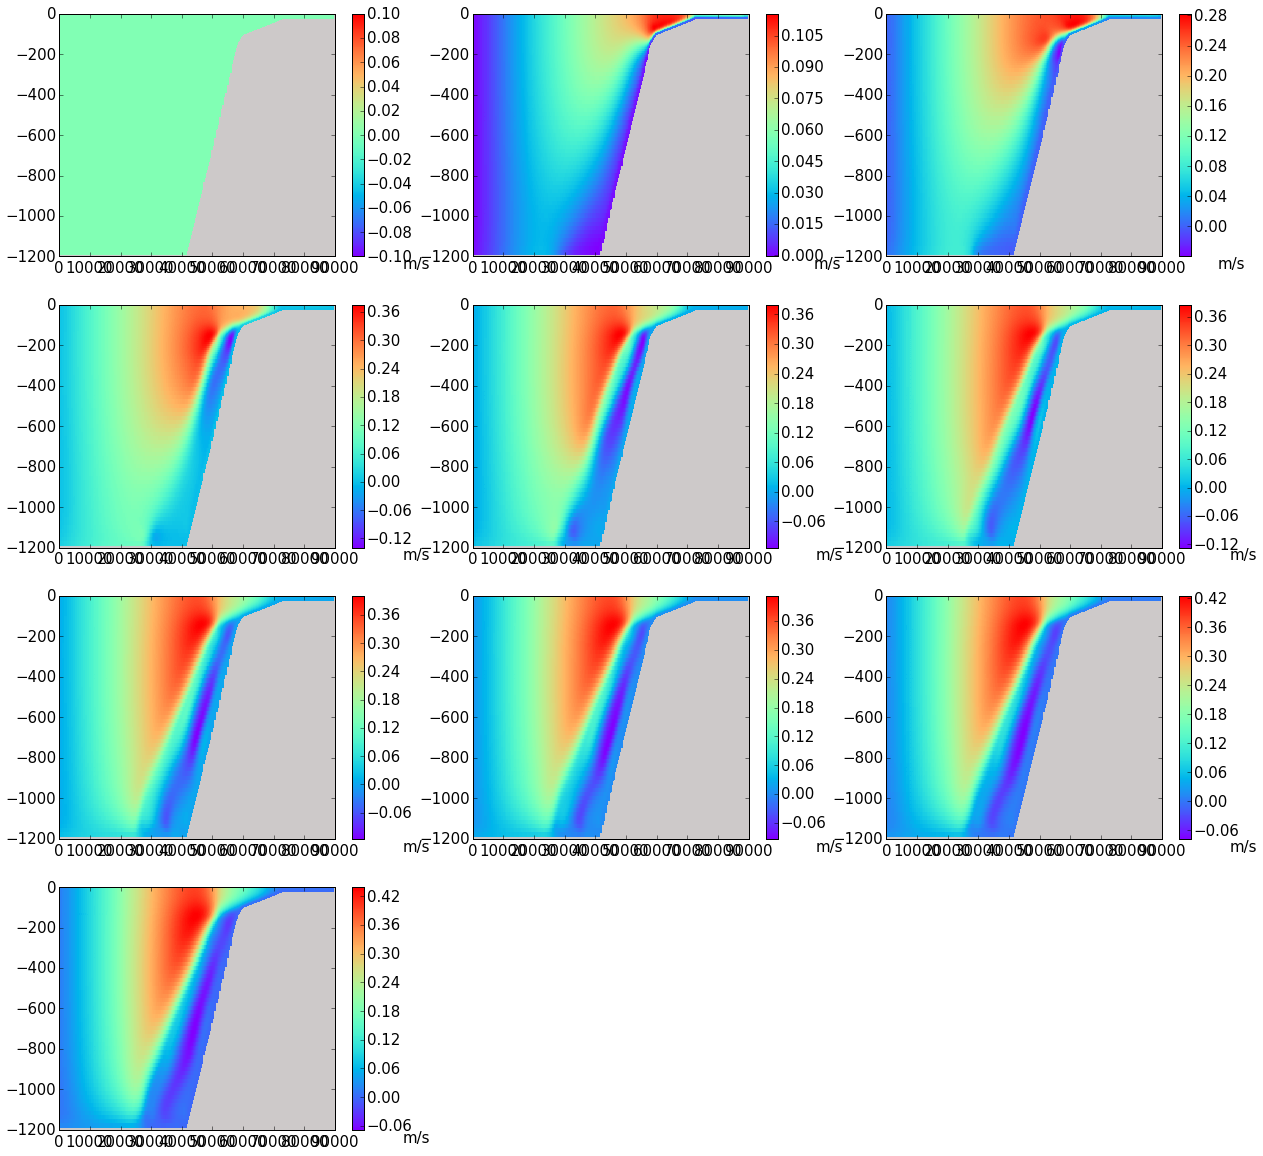

In [14]:
trac = getField(filename, 'U')

plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        Trmask=np.ma.array(trac[tt,:,:,:-1],mask=MASKhFacC[:,:,:-1])
        #Trmask=np.ma.array(u2[tt,:,:,:],mask=MASKhFacC[:,:-1,:])
        fig1=plt.pcolor(yc[:,180],z[:],Trmask[:,:,180],cmap='rainbow')
        
        #pl.clim([0, 0.4])
        
        cb = plt.colorbar()
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
        
       



Across-shelf velocity along canyon axis:

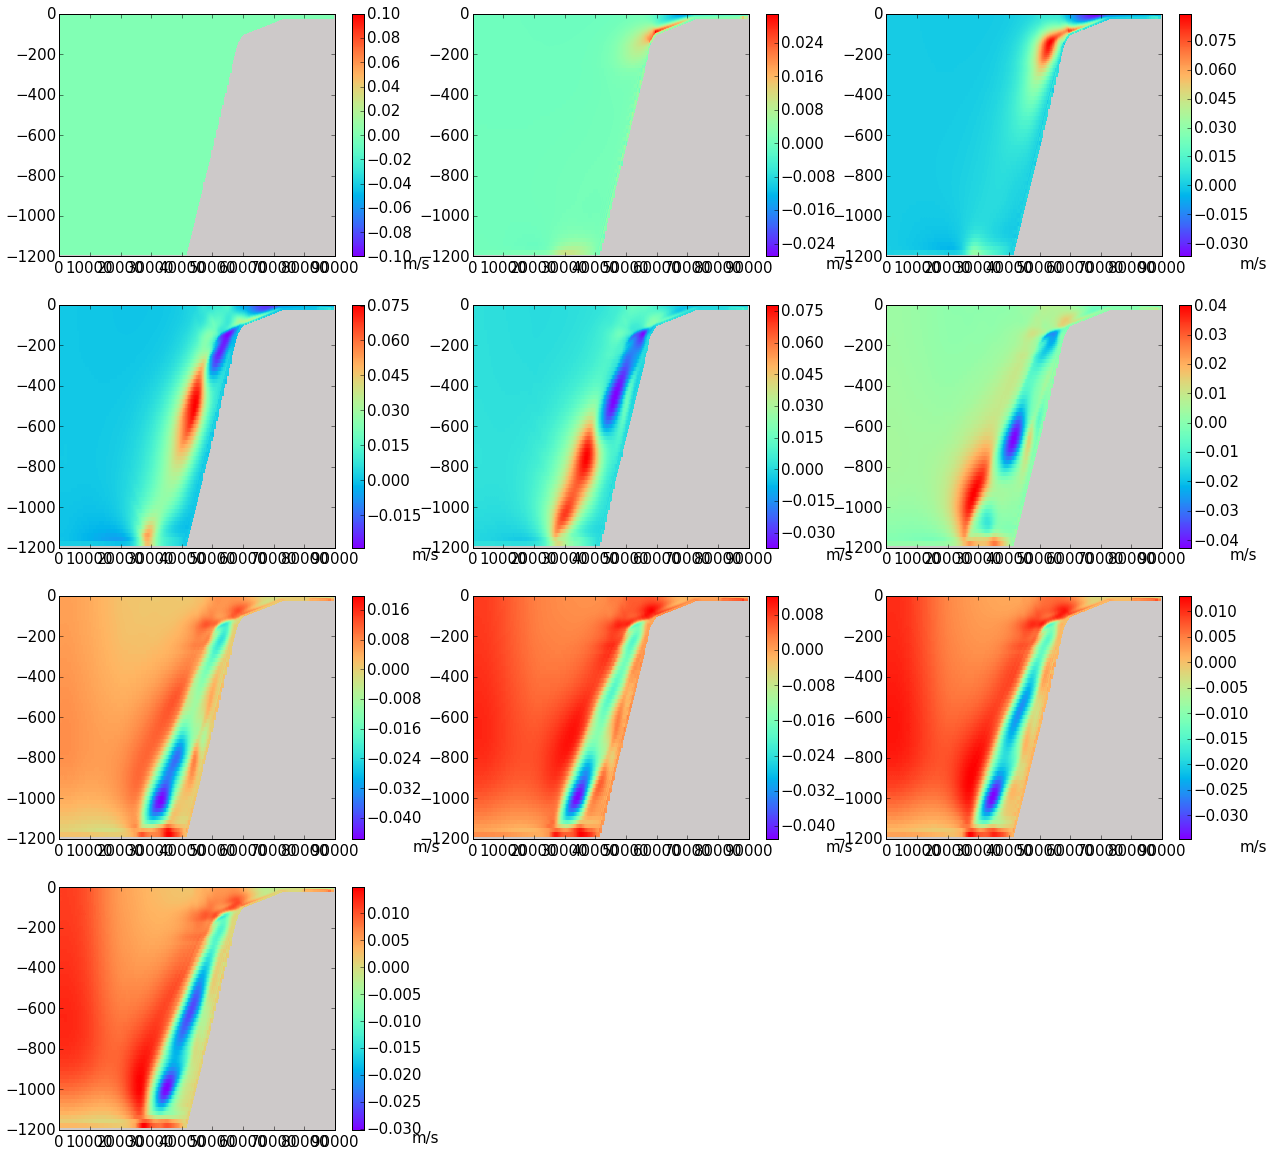

In [15]:
#trac = getField(filename, 'V')

plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        #Trmask=np.ma.array(trac[tt,:,:-1,:],mask=MASKhFacC[:,:,:])
        Trmask=np.ma.array(v2[tt,:,:,:],mask=MASKhFacC[:,:-1,:-1])
       
        fig1=plt.pcolor(yc[:,180],z[:],Trmask[:,:,180],cmap='rainbow')
        
        #pl.clim([0, 0.4])
        
        cb = plt.colorbar()
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
        
       



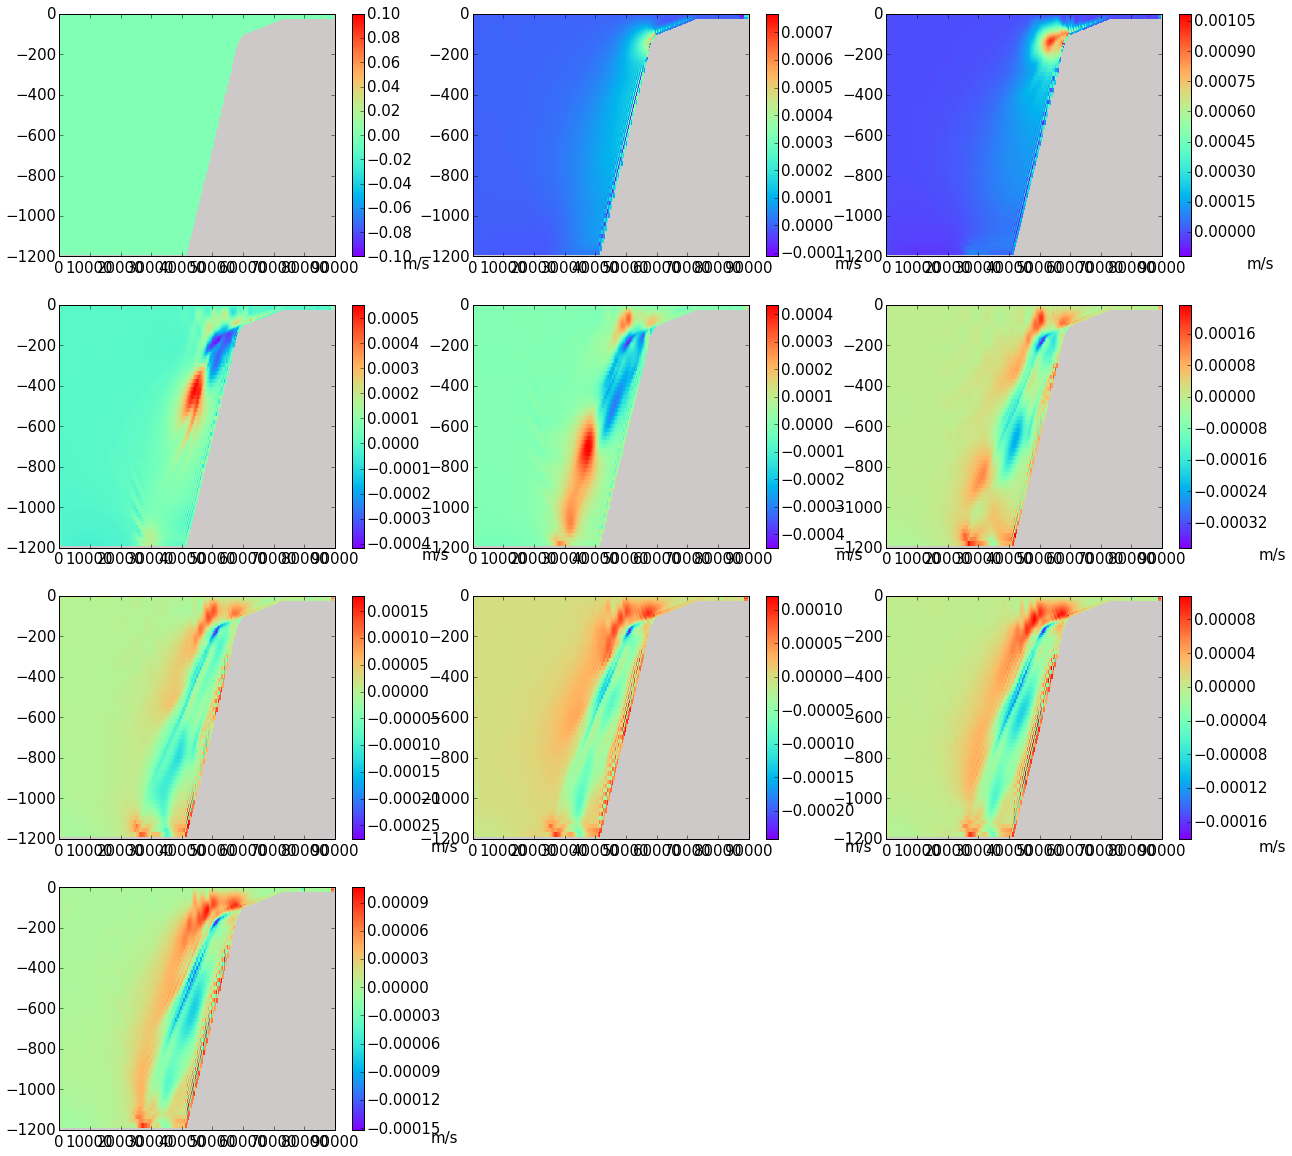

In [16]:
trac = getField(filename, 'W')

plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        Trmask=np.ma.array(trac[tt,:,:,:],mask=MASKhFacC[:,:,:])
       
        fig1=plt.pcolor(yc[:,180],z[:],Trmask[:,:,180],cmap='rainbow')
        
        #pl.clim([0, 0.4])
        
        cb = plt.colorbar()
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
        
       



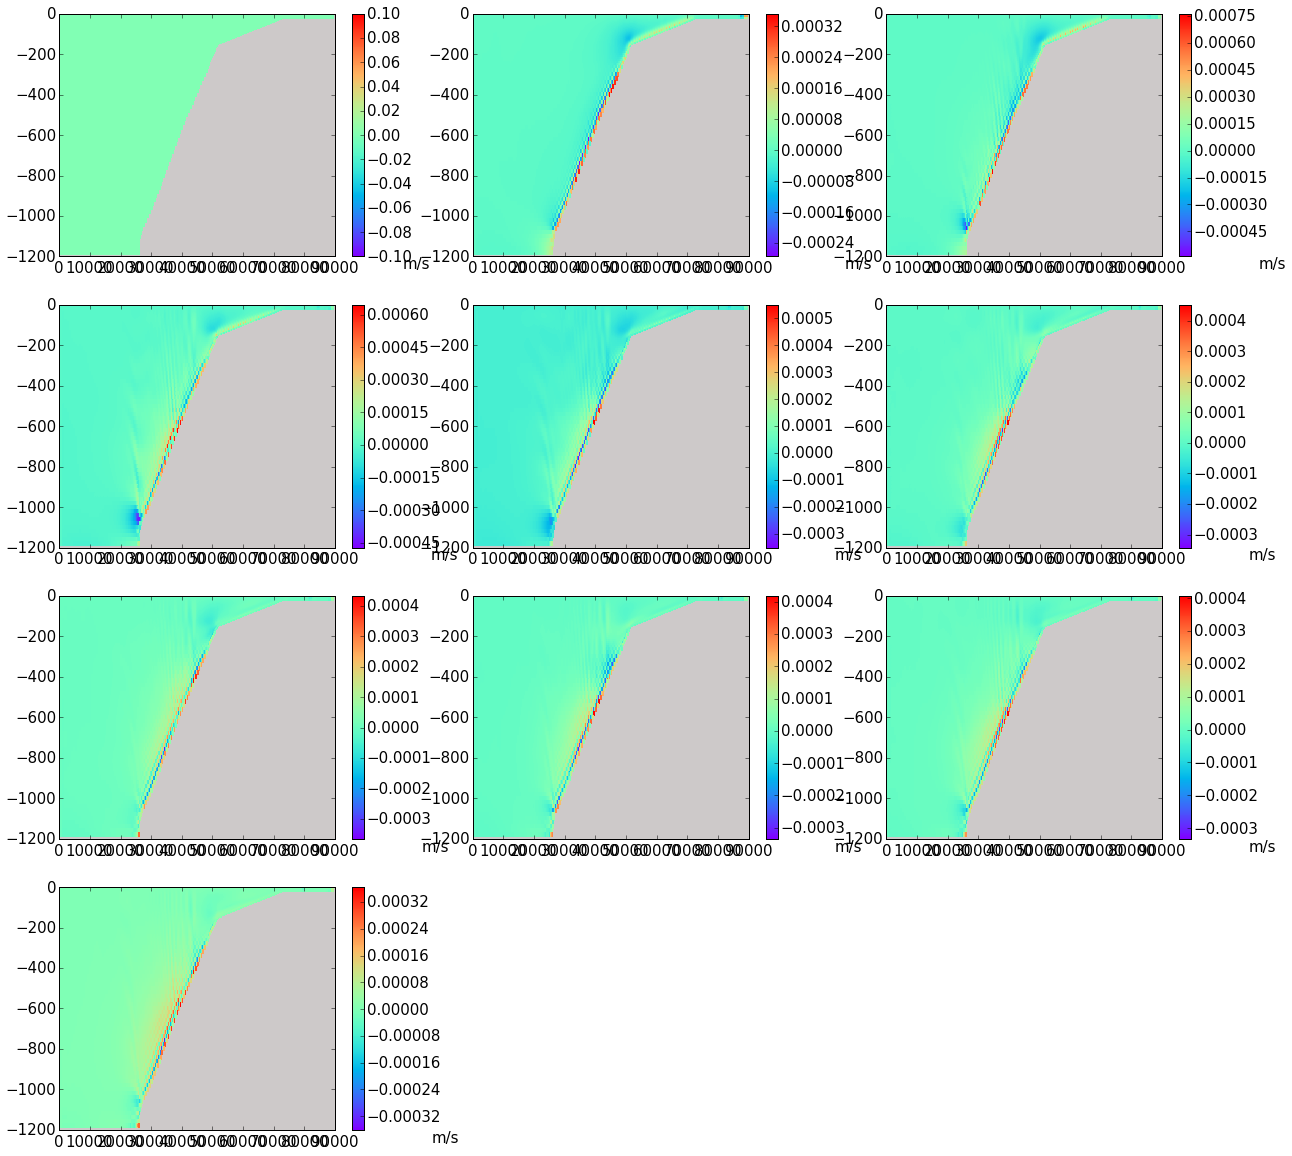

In [17]:
trac = getField(filename, 'W')

plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        Trmask=np.ma.array(trac[tt,:,:,:],mask=MASKhFacC[:,:,:])
       
        fig1=plt.pcolor(yc[:,100],z[:],Trmask[:,:,100],cmap='rainbow')
        
        #pl.clim([0, 0.4])
        
        cb = plt.colorbar()
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
        
       

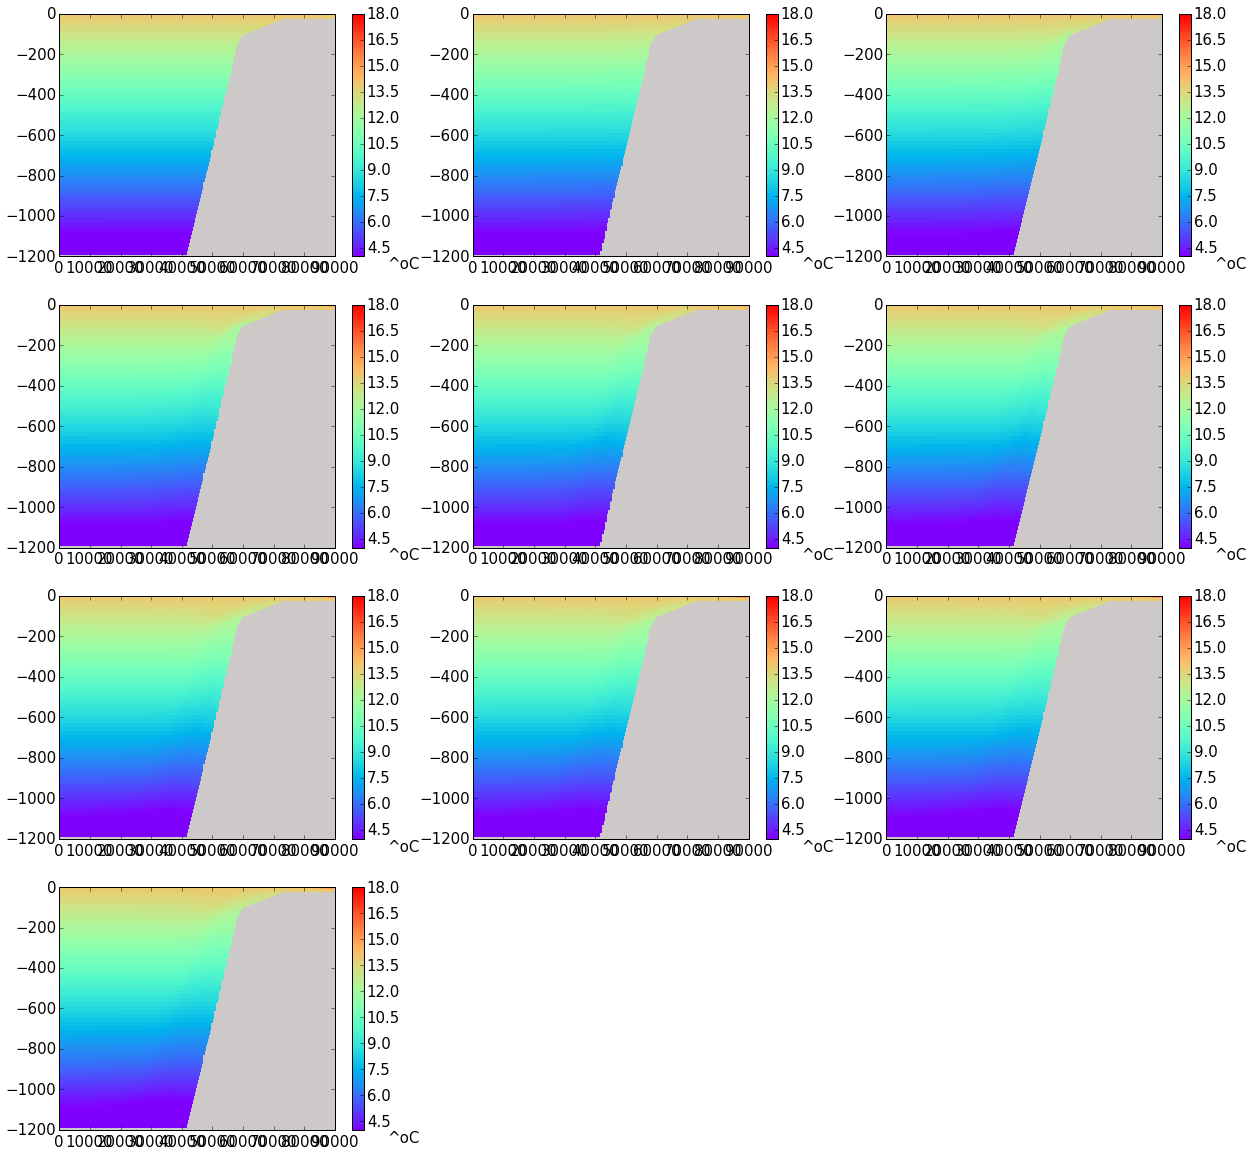

In [18]:


plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        
        Trmask=np.ma.array(temp[tt,:,:,:],mask=MASKhFacC[:,:,:])
        fig1=plt.pcolor(yc[:,180],z[:],Trmask[:,:,180],cmap='rainbow')
        
        pl.clim([4, 18])
        
        cb = plt.colorbar()
        
        cb.set_label('^oC', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
        
       



50100.0


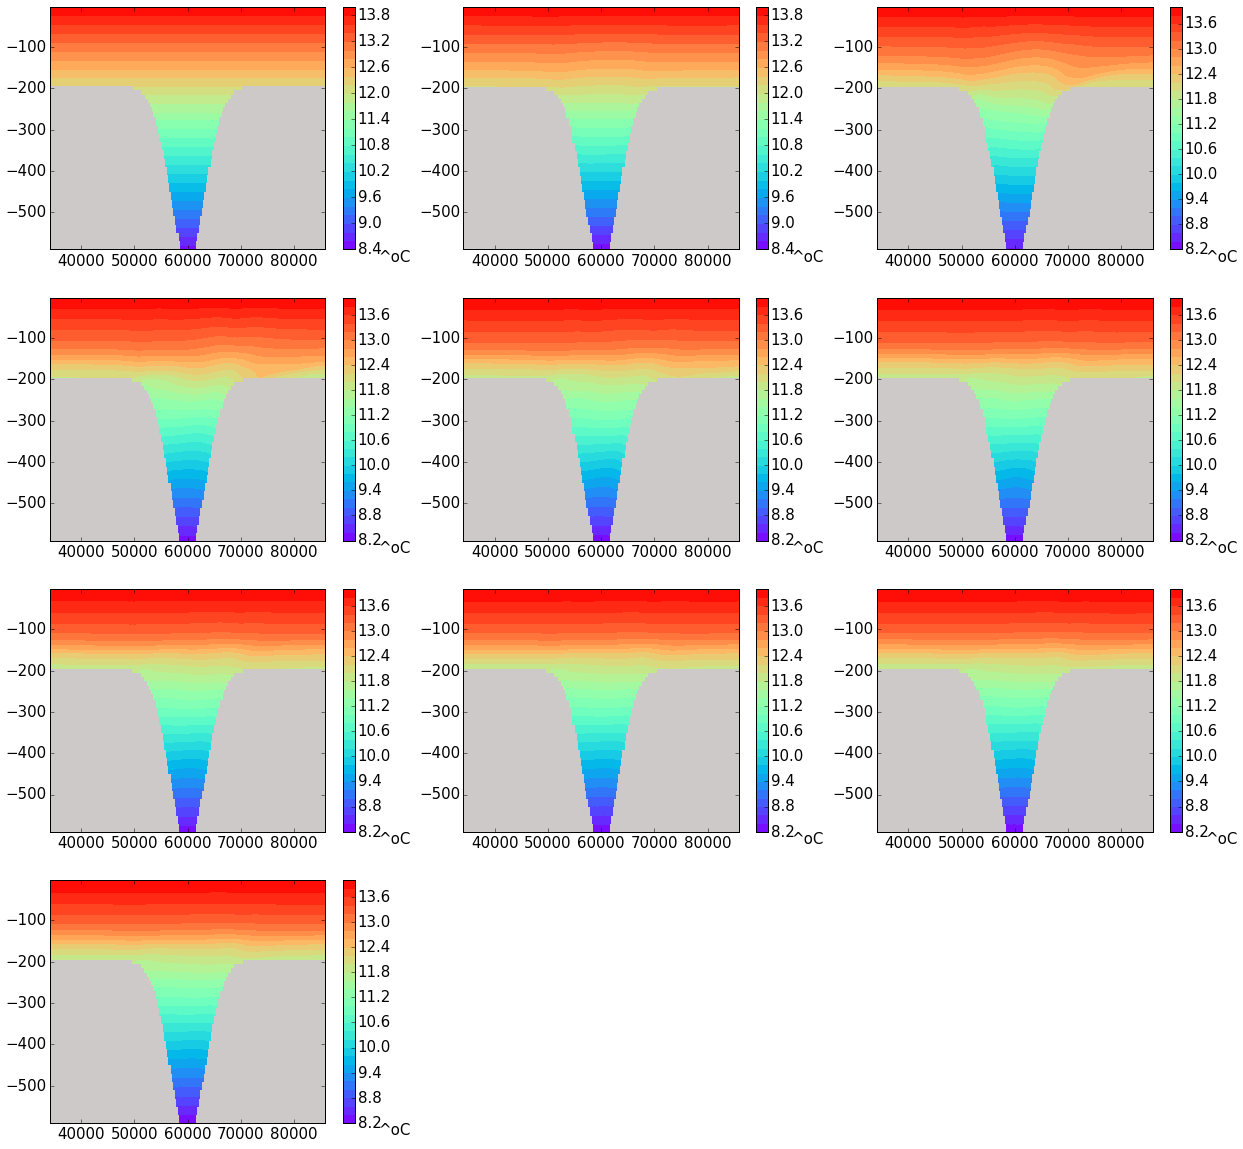

In [19]:
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        
        Trmask=np.ma.array(temp[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        fig1=plt.contourf(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],30,cmap='rainbow')
        
        #pl.clim([4, 18])
        
        cb = plt.colorbar()
        
        cb.set_label('^oC', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
print(yc[190,0])        
       



52100.0


/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


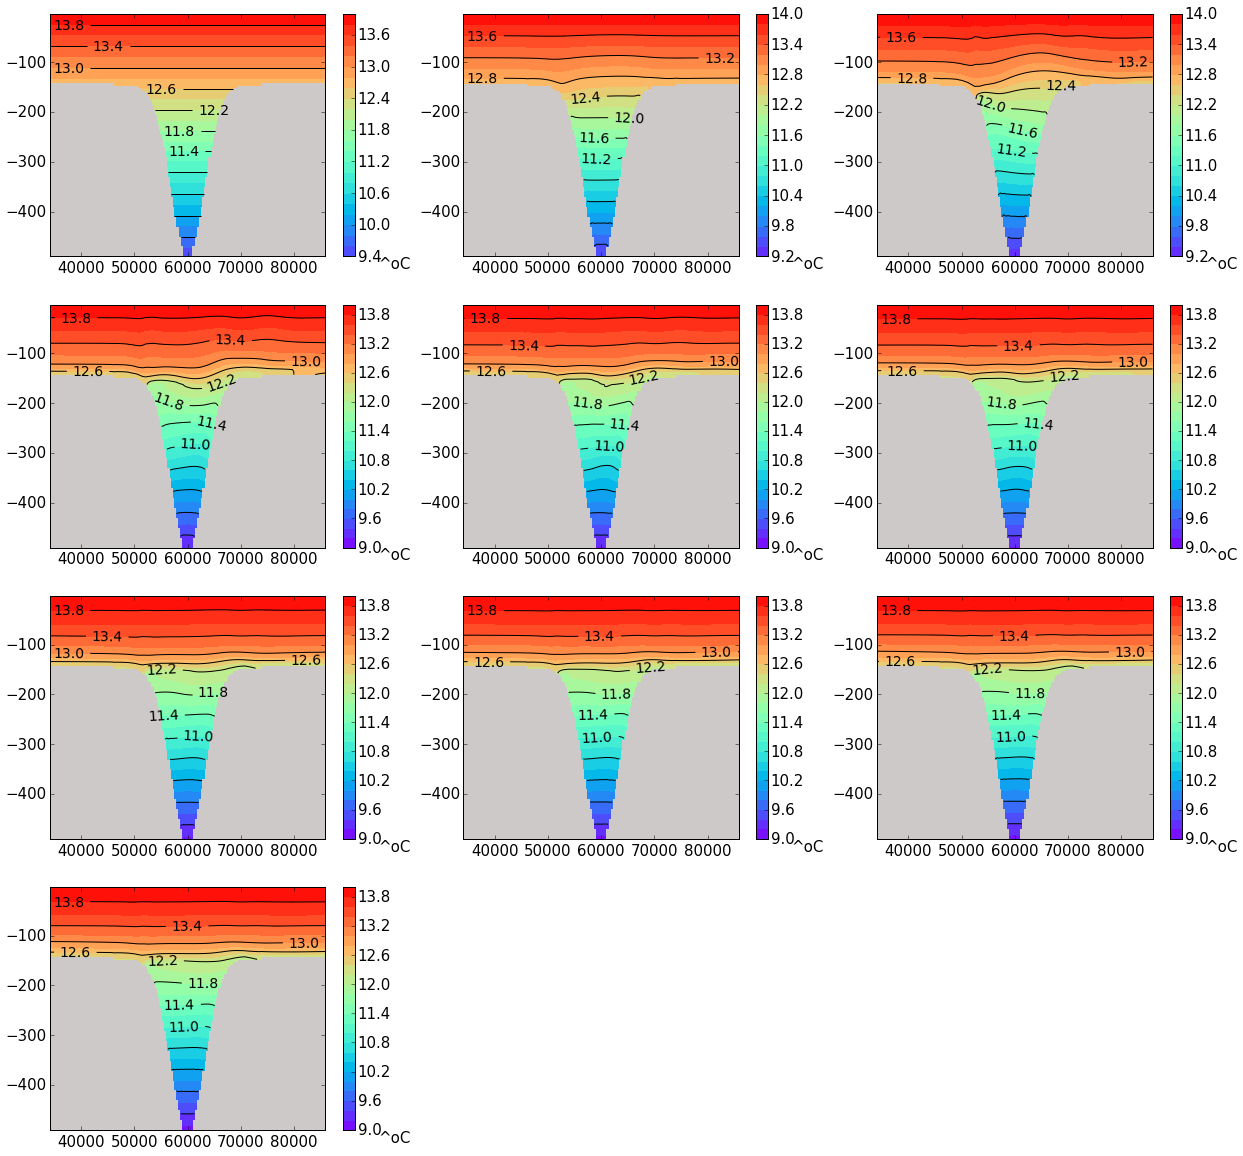

In [20]:
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        
        Trmask=np.ma.array(temp[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        CS=plt.contourf(xc[200,50:-50],z[:-35],Trmask[:-35,200,50:-50],30,cmap='rainbow')
        plt.clim([9, 14])
        cb = plt.colorbar()
        
        CS2 = plt.contour(CS, levels=CS.levels[::2],
                        colors = 'k',
                        hold='on')
        plt.clabel(CS2, fmt = '%2.1f', colors = 'k', fontsize=14)
        
        
        
        cb.set_label('^oC', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
print(yc[200,0])  

52100.0


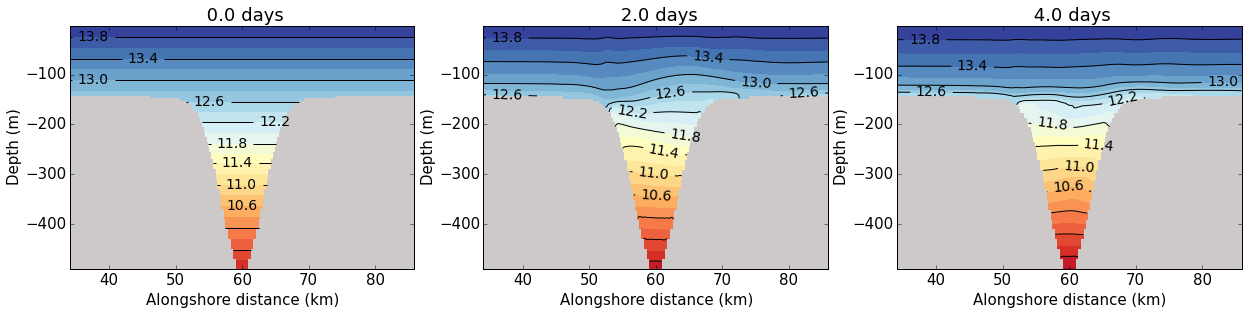

In [21]:
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,4,8] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        
        Trmask=np.ma.array(temp[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        levels=np.arange(9,14.4,0.2)
        CS=plt.contourf(xc[200,50:-50],z[:-35],Trmask[:-35,200,50:-50],levels,cmap='RdYlBu')
        #cb = plt.colorbar()
        plt.clim([9, 14])
        
        CS2 = plt.contour(CS, levels=CS.levels[::2],
                        colors = 'k',
                        hold='on')
        plt.clabel(CS2, fmt = '%2.1f', colors = 'k', fontsize=14)
        
        
        plt.ylabel('Depth (m)')
        plt.xlabel('Alongshore distance (km)')
        cb.set_label('$^oC$', position=(1, 0),rotation=0)
        labels = [40, 50, 60, 70, 80]
        plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
       
            
        kk=kk+1
print(yc[200,0]) 

plt.savefig('IsothermsRun13.eps', bbox_inches='tight')

52100.0


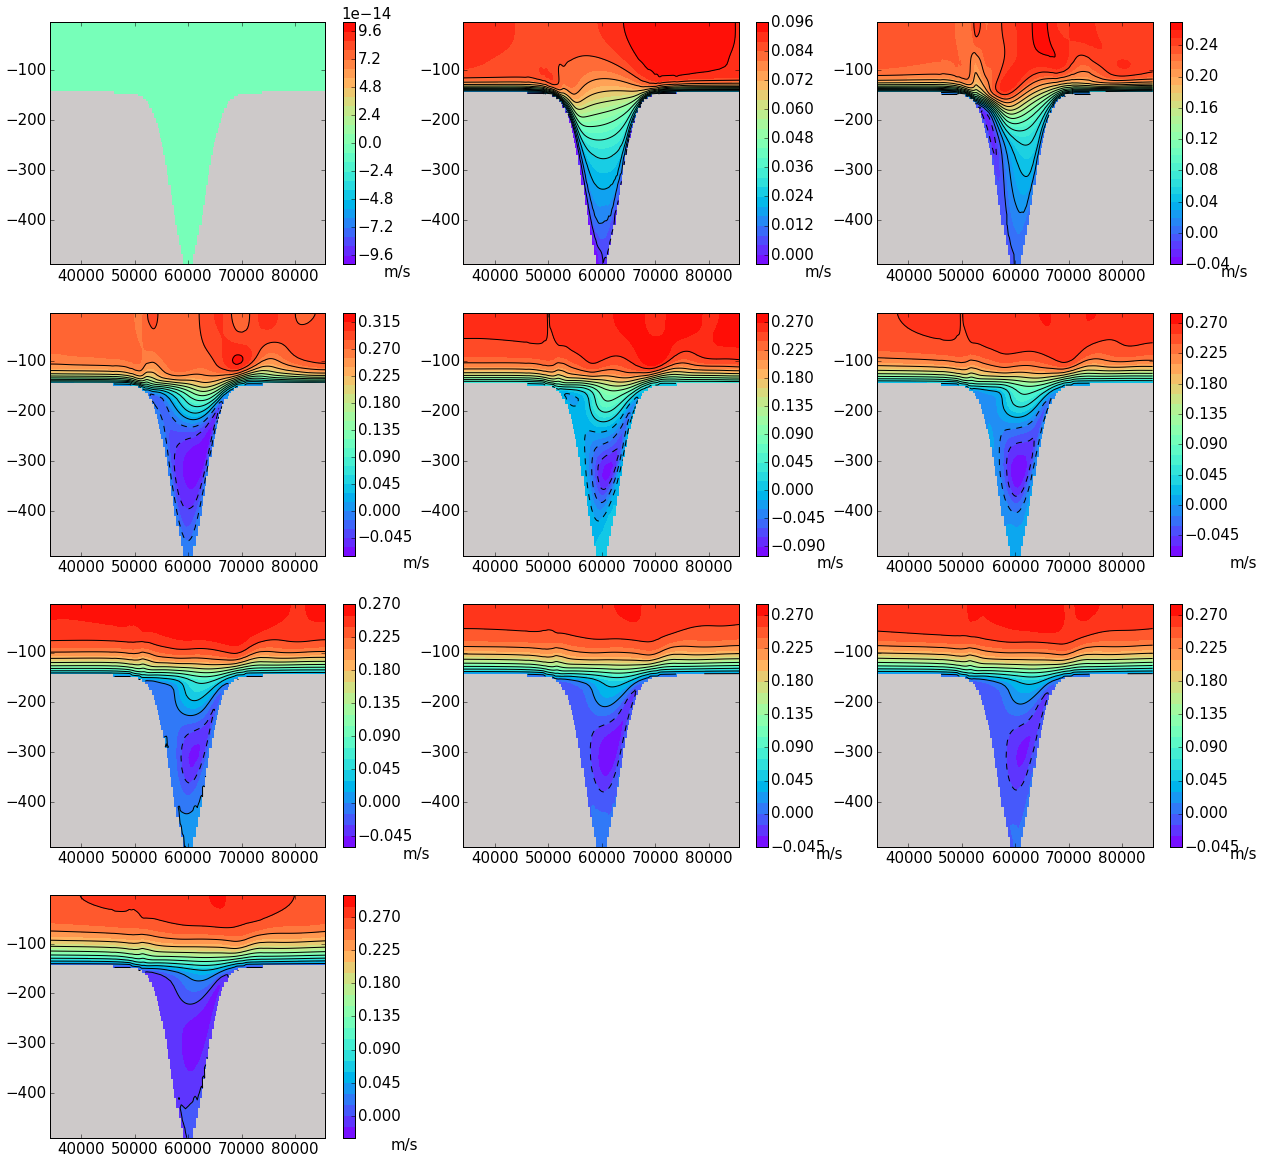

In [70]:
trac = u2
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        
        Trmask=np.ma.array(trac[tt,:,:,:],mask=MASKhFacC[:,:-1,:-1])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        CS=plt.contourf(xc[200,50:-51],z[:-35],Trmask[:-35,200,50:-50],30,cmap='rainbow')
        #plt.clim([9, 14])
        cb = plt.colorbar()
        
        CS2 = plt.contour(CS, levels=CS.levels[::2],
                        colors = 'k',
                        hold='on')
        
        
        
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
print(yc[200,0])  

52100.0


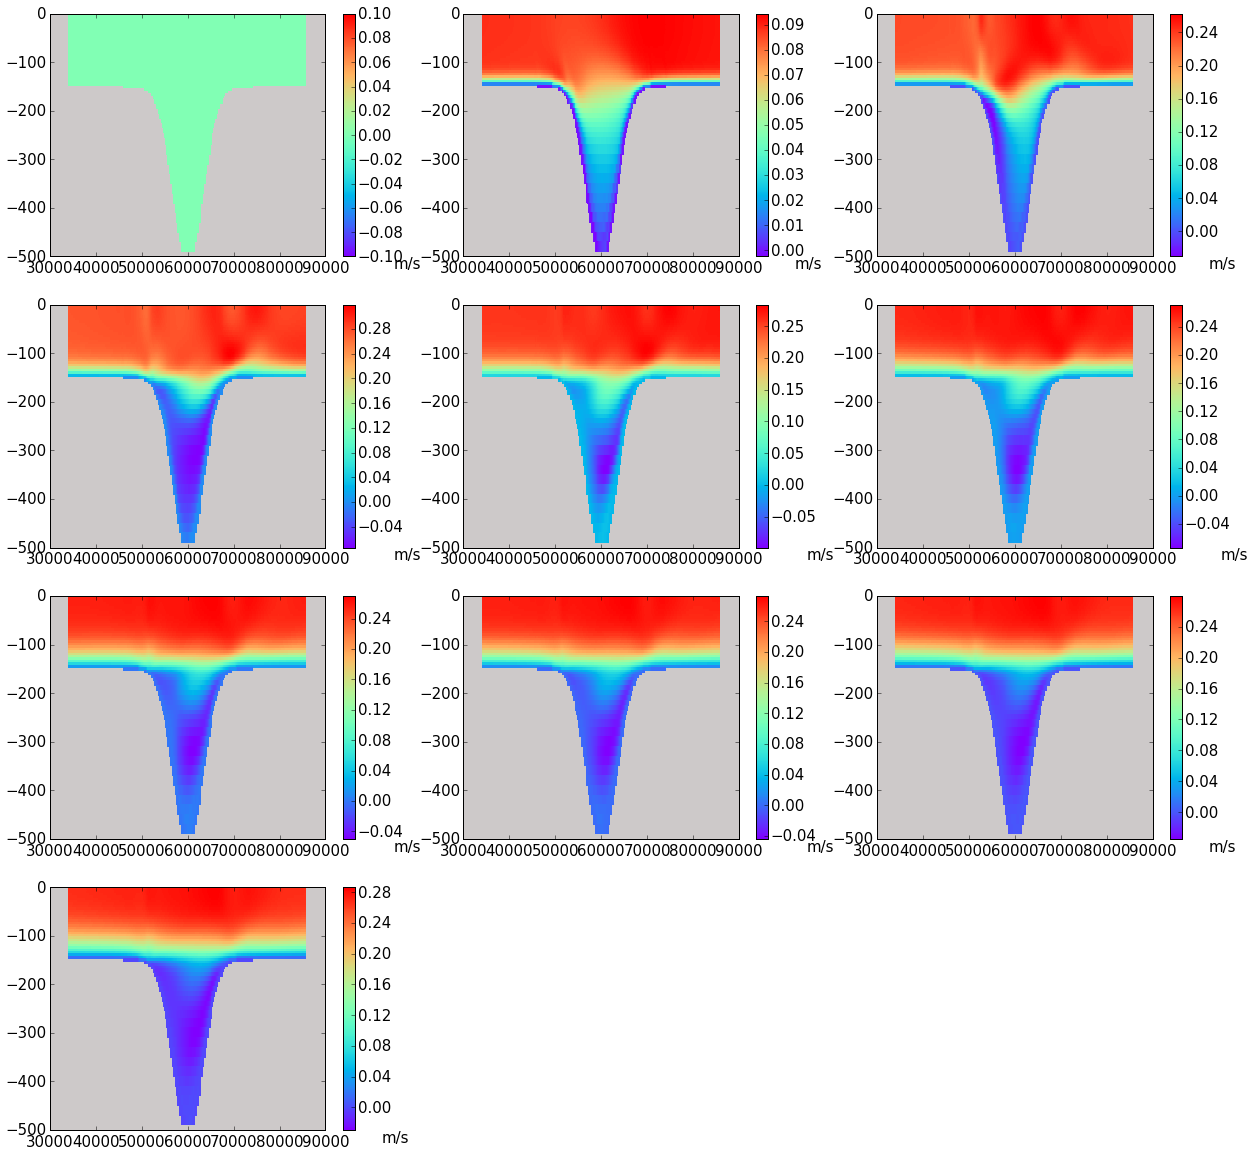

In [71]:
trac = u2
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        
        Trmask=np.ma.array(trac[tt,:,:,:],mask=MASKhFacC[:,:-1,:-1])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        CS=plt.pcolor(xc[200,50:-51],z[:-35],Trmask[:-35,200,50:-50],cmap='rainbow')
        #plt.clim([9, 14])
        cb = plt.colorbar()
        
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
print(yc[200,0])  

52100.0


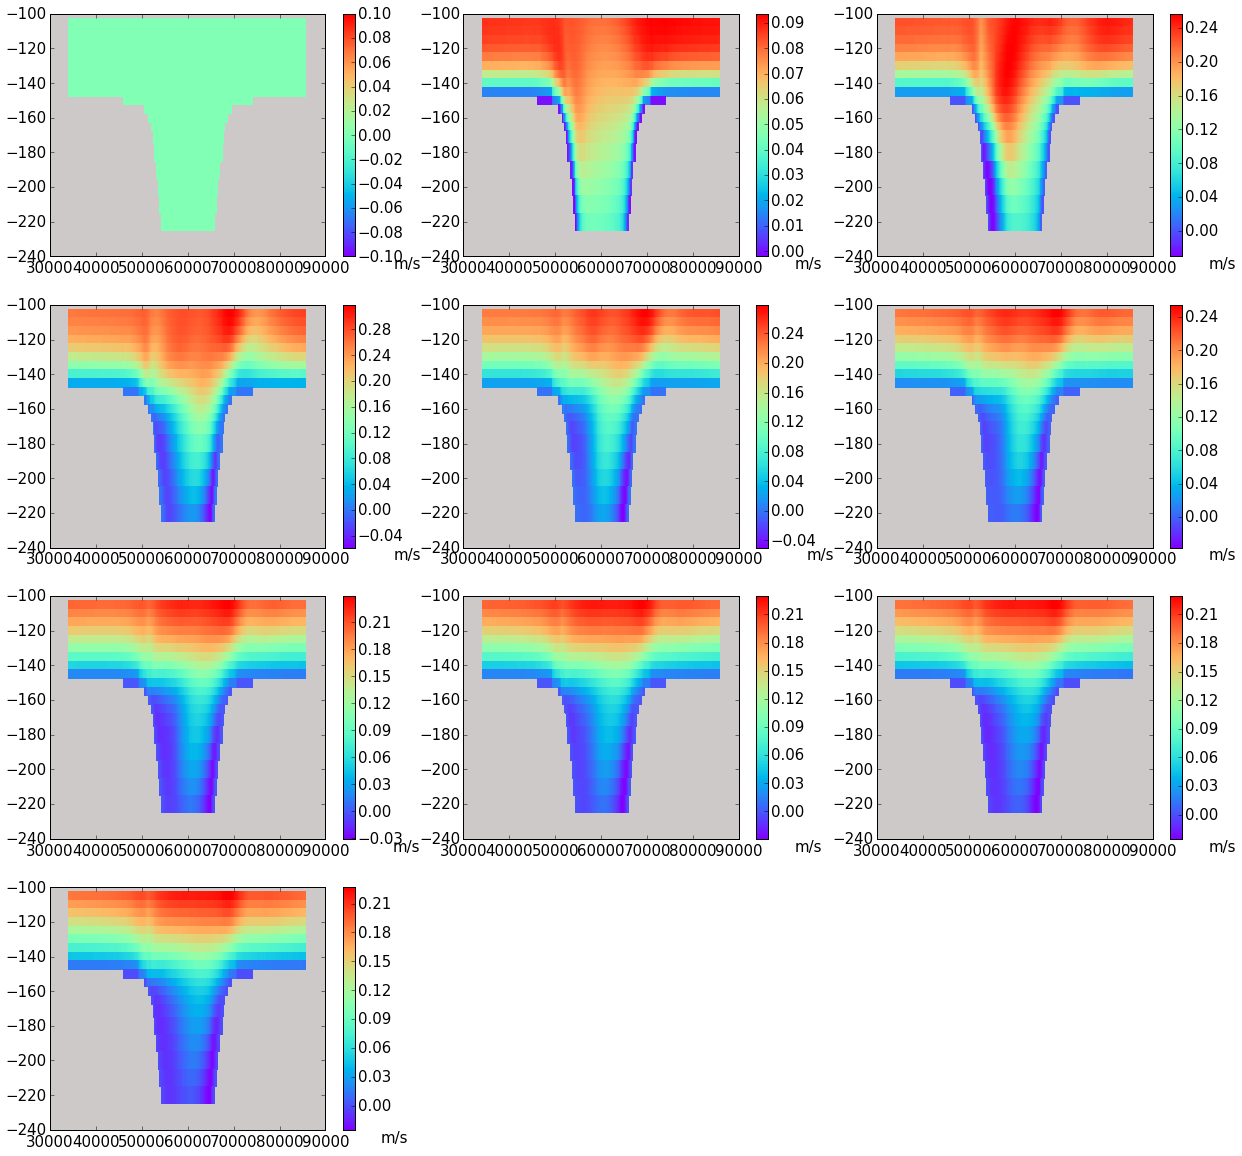

In [72]:
#Zoom into bottom boundary layer over the shelf

trac = u2
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        
        Trmask=np.ma.array(trac[tt,:,:,:],mask=MASKhFacC[:,:-1,:-1])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        CS=plt.pcolor(xc[200,50:-51],z[20:40],Trmask[20:40,200,50:-50],cmap='rainbow')
        #plt.clim([9, 14])
        cb = plt.colorbar()
        
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
print(yc[200,0])  

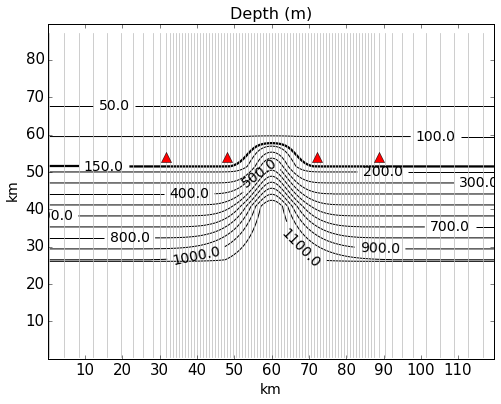

In [88]:
plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(8,6))

plt.plot(xc[::4,::4],yc[::4,::4],linewidth=0.75, linestyle='-', color='0.75')

plt.plot(xc[210,120],yc[210,120],'r^',markersize=10 )

plt.plot(xc[210,240],yc[210,240],'r^',markersize=10 )

plt.plot(xc[210,40],yc[210,40],'r^',markersize=10 )

plt.plot(xc[210,320],yc[210,320],'r^',markersize=10 )


lev = range(200,1200,100)

levels = [50,100,150]+lev

CS = plt.contour(xc,yc,bathy,levels,colors='k',linewidths=[1,1,2.25,1,1,1,1,1,1,1,1,1,1] )

plt.clabel(CS, 
           inline=1,
          fmt='%1.1f',
           fontsize=14)



plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

plt.xlabel('km',fontsize=14)
plt.ylabel('km',fontsize=14)

plt.title('Depth (m)',fontsize=16)


#plt.savefig('AcrossShoreLines.png', bbox_inches='tight')
#plt.savefig('AcrossShoreLines.pdf', bbox_inches='tight')



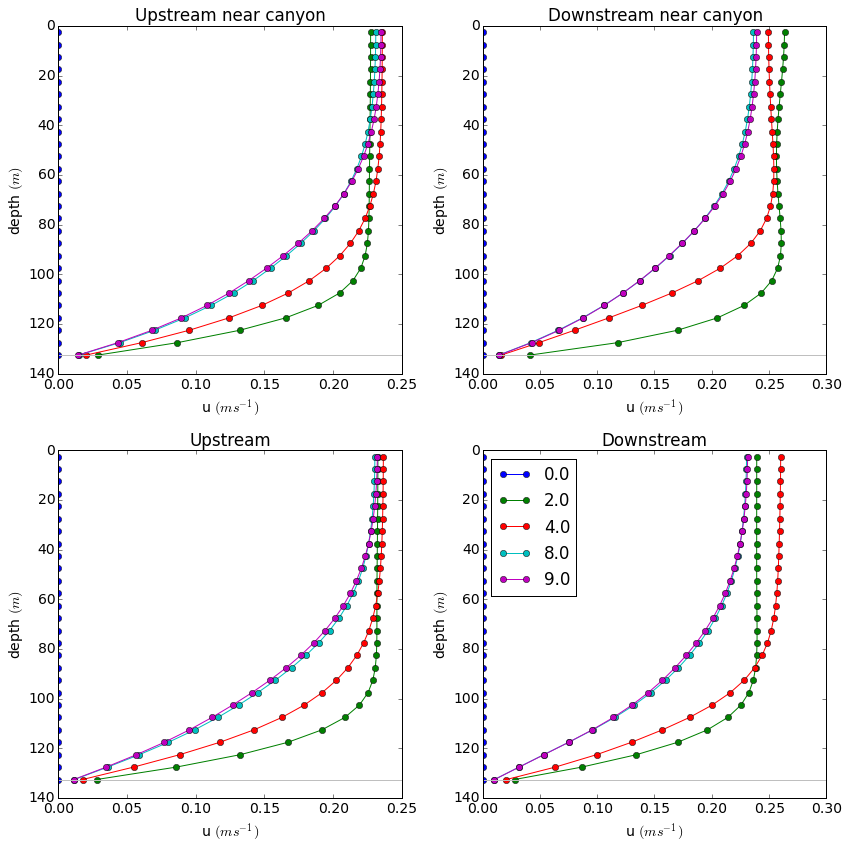

x1 location = 48100.0 m
y location = 54100.0 m
x2 location = 72100.0 m
x3 location = 31761.0 m
x4 location = 88657.0 m


In [102]:
#Profile alongshore velocity (u) from surface to shelf- bottom boundary layer over the shelf

trac = u2
plt.rcParams.update({'font.size':14})

kk=1

fig45=plt.figure(figsize=(12,12))

for tt in [0,4,8,16,18] :
        
        kk=1
        plt.subplot(2,2,kk)
        ax = plt.gca()
        
        Trmask=np.ma.array(trac[tt,:,:,:],mask=MASKhFacC[:,:-1,:-1])
        
        plt.plot(Trmask[0:28,210,120],-z[0:28],'-o',label=str(tt/2.0))
        plt.axhline(y=-z[26],xmin=-0.05,xmax=1,linestyle='-', color='0.75')
        plt.gca().invert_yaxis()
        plt.title('Upstream near canyon')
        plt.xlabel('u $(ms^{-1})$')
        plt.ylabel('depth $(m)$')
        
        
        plt.subplot(2,2,kk+1)
        ax = plt.gca()
        
        Trmask=np.ma.array(trac[tt,:,:,:],mask=MASKhFacC[:,:-1,:-1])
        
        plt.plot(Trmask[0:28,210,240],-z[0:28],'-o',label=str(tt/2.0))
        plt.axhline(y=-z[26],xmin=-0.05,xmax=1,linestyle='-', color='0.75')
        plt.gca().invert_yaxis()
        plt.title('Downstream near canyon')
        plt.xlabel('u $(ms^{-1})$')
        plt.ylabel('depth $(m)$')
       
        
        plt.subplot(2,2,kk+2)
        ax = plt.gca()
        
        Trmask=np.ma.array(trac[tt,:,:,:],mask=MASKhFacC[:,:-1,:-1])
        
        plt.plot(Trmask[0:28,210,40],-z[0:28],'-o',label=str(tt/2.0))
        plt.axhline(y=-z[26],xmin=-0.05,xmax=1,linestyle='-', color='0.75')
        plt.gca().invert_yaxis()
        plt.title('Upstream')
        plt.xlabel('u $(ms^{-1})$')
        plt.ylabel('depth $(m)$')
       
        
        plt.subplot(2,2,kk+3)
        ax = plt.gca()
        
        Trmask=np.ma.array(trac[tt,:,:,:],mask=MASKhFacC[:,:-1,:-1])
        
        plt.plot(Trmask[0:28,210,320],-z[0:28],'-o',label=str(tt/2.0))
        plt.axhline(y=-z[26],xmin=-0.05,xmax=1,linestyle='-', color='0.75')
        plt.gca().invert_yaxis()
        plt.title('Downstream')
        plt.xlabel('u $(ms^{-1})$')
        plt.ylabel('depth $(m)$')
          
        
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()
print("x1 location = %1.1f m" % xc[210,120])
print("y location = %1.1f m" % yc[210,120])
print("x2 location = %1.1f m" % xc[210,240])
print("x3 location = %1.1f m" % xc[210,40])
print("x4 location = %1.1f m" % xc[210,320])



52100.0


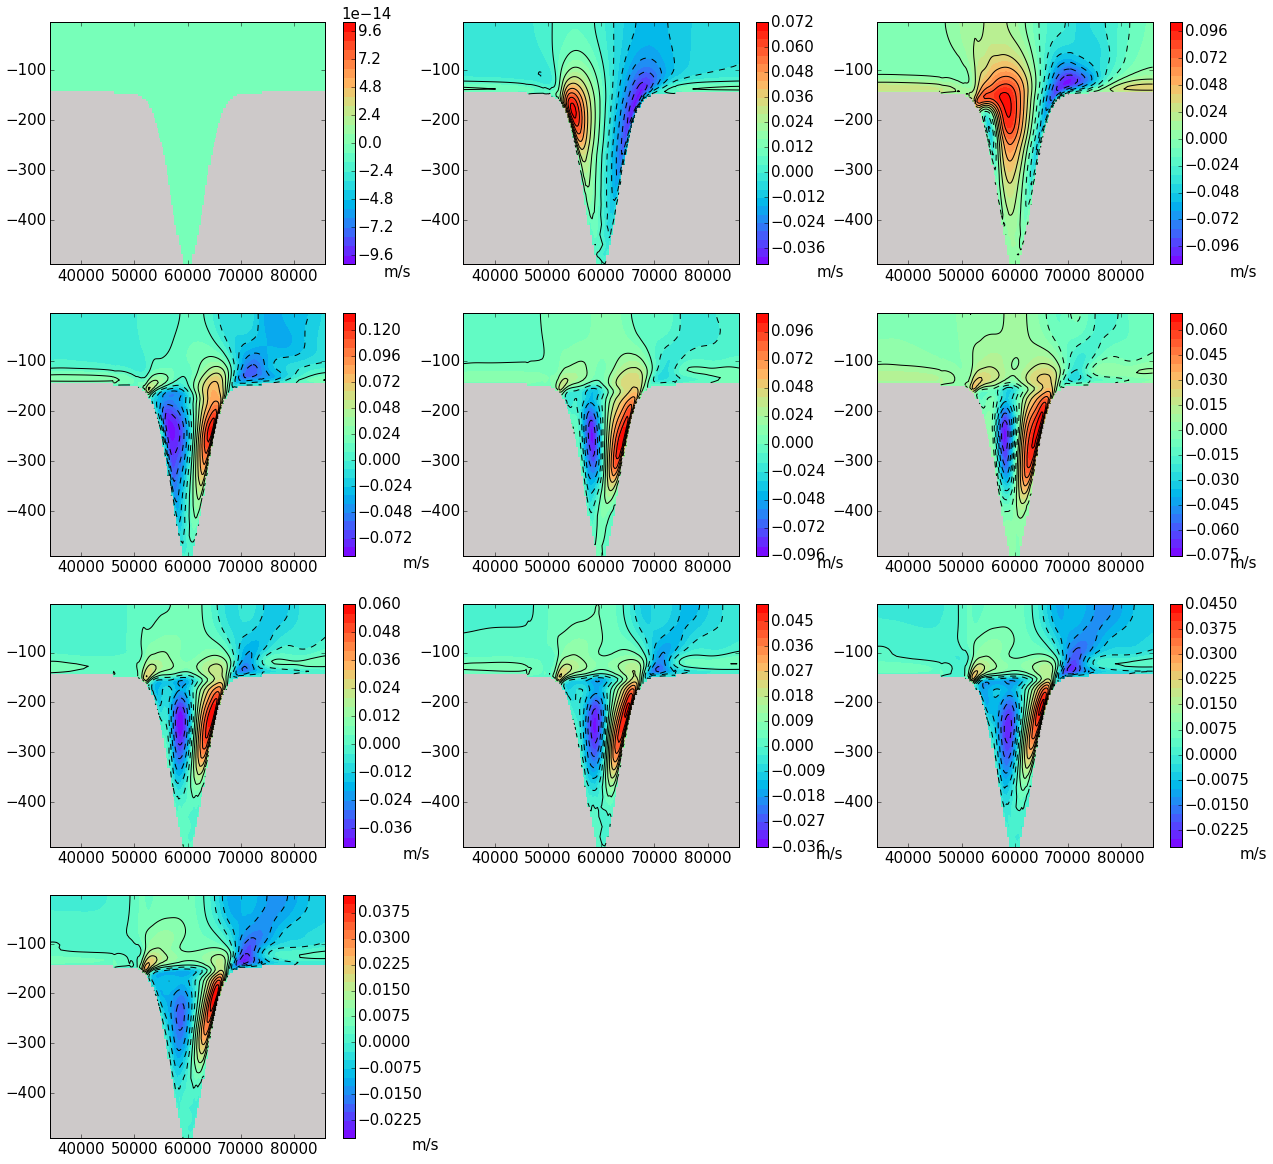

In [26]:
trac = getField(filename, 'V')
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        
        Trmask=np.ma.array(trac[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        CS=plt.contourf(xc[200,50:-50],z[:-35],Trmask[:-35,200,50:-50],30,cmap='rainbow')
        #plt.clim([9, 14])
        cb = plt.colorbar()
        
        CS2 = plt.contour(CS, levels=CS.levels[::2],
                        colors = 'k',
                        hold='on')
        
        
        
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
print(yc[200,0])  

52100.0


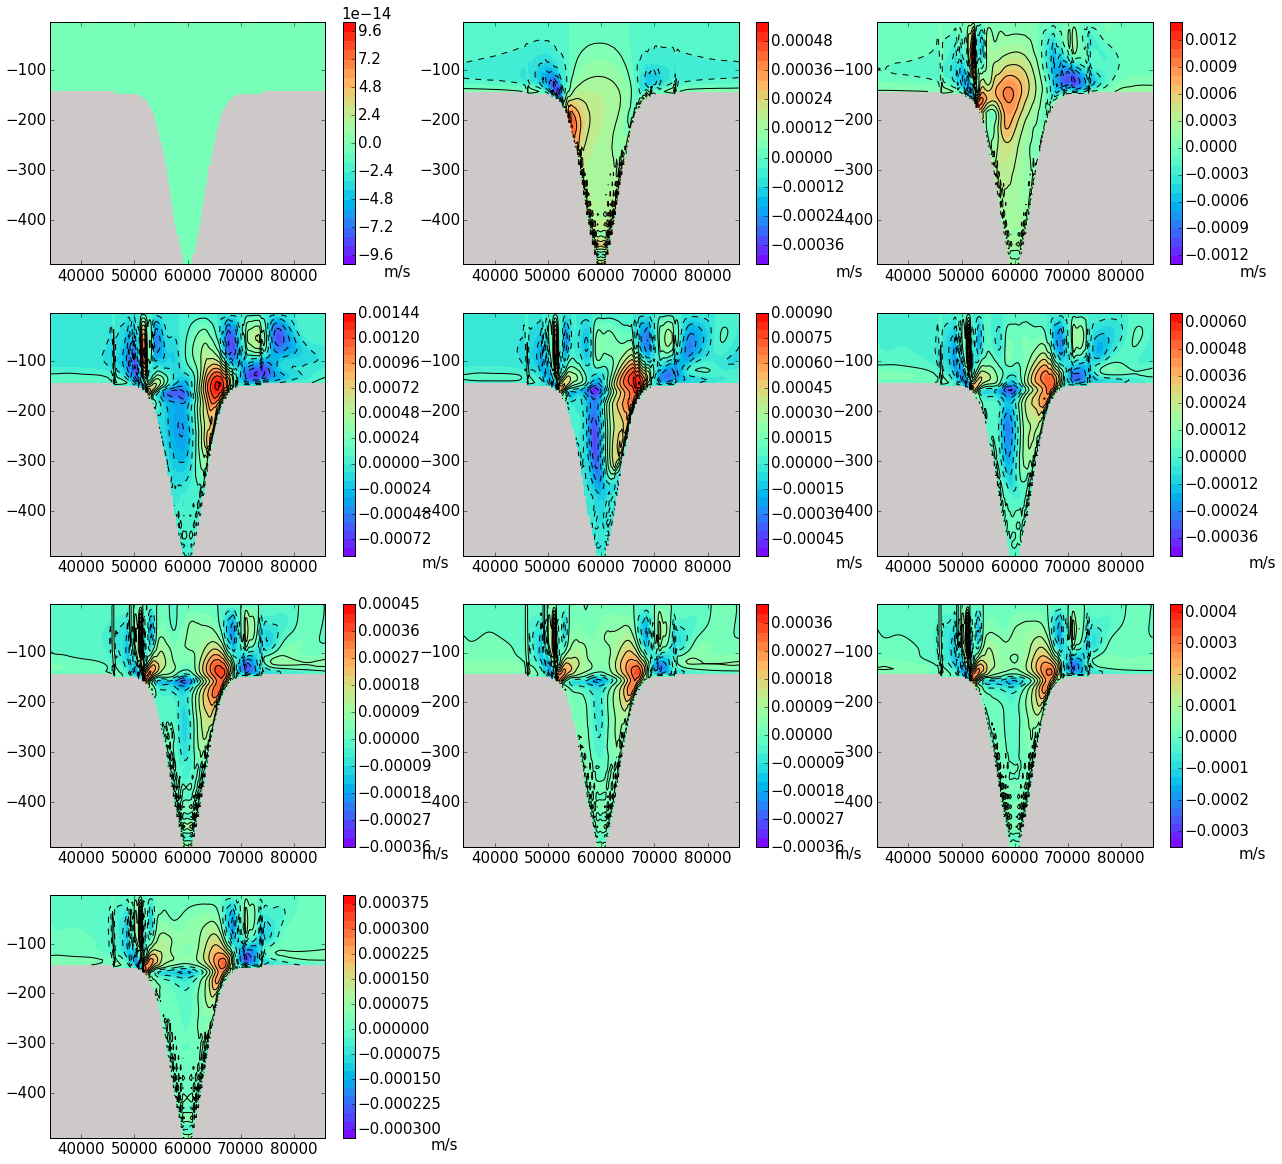

In [27]:
trac = getField(filename, 'W')
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        
        Trmask=np.ma.array(trac[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        CS=plt.contourf(xc[200,50:-50],z[:-35],Trmask[:-35,200,50:-50],30,cmap='rainbow')
        #plt.clim([9, 14])
        cb = plt.colorbar()
        
        CS2 = plt.contour(CS, levels=CS.levels[::2],
                        colors = 'k',
                        hold='on')
        
        
        
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
print(yc[200,0])  

Tracers

KvTr1=E-5

KvTr2=E-3

KvTr3=E-1

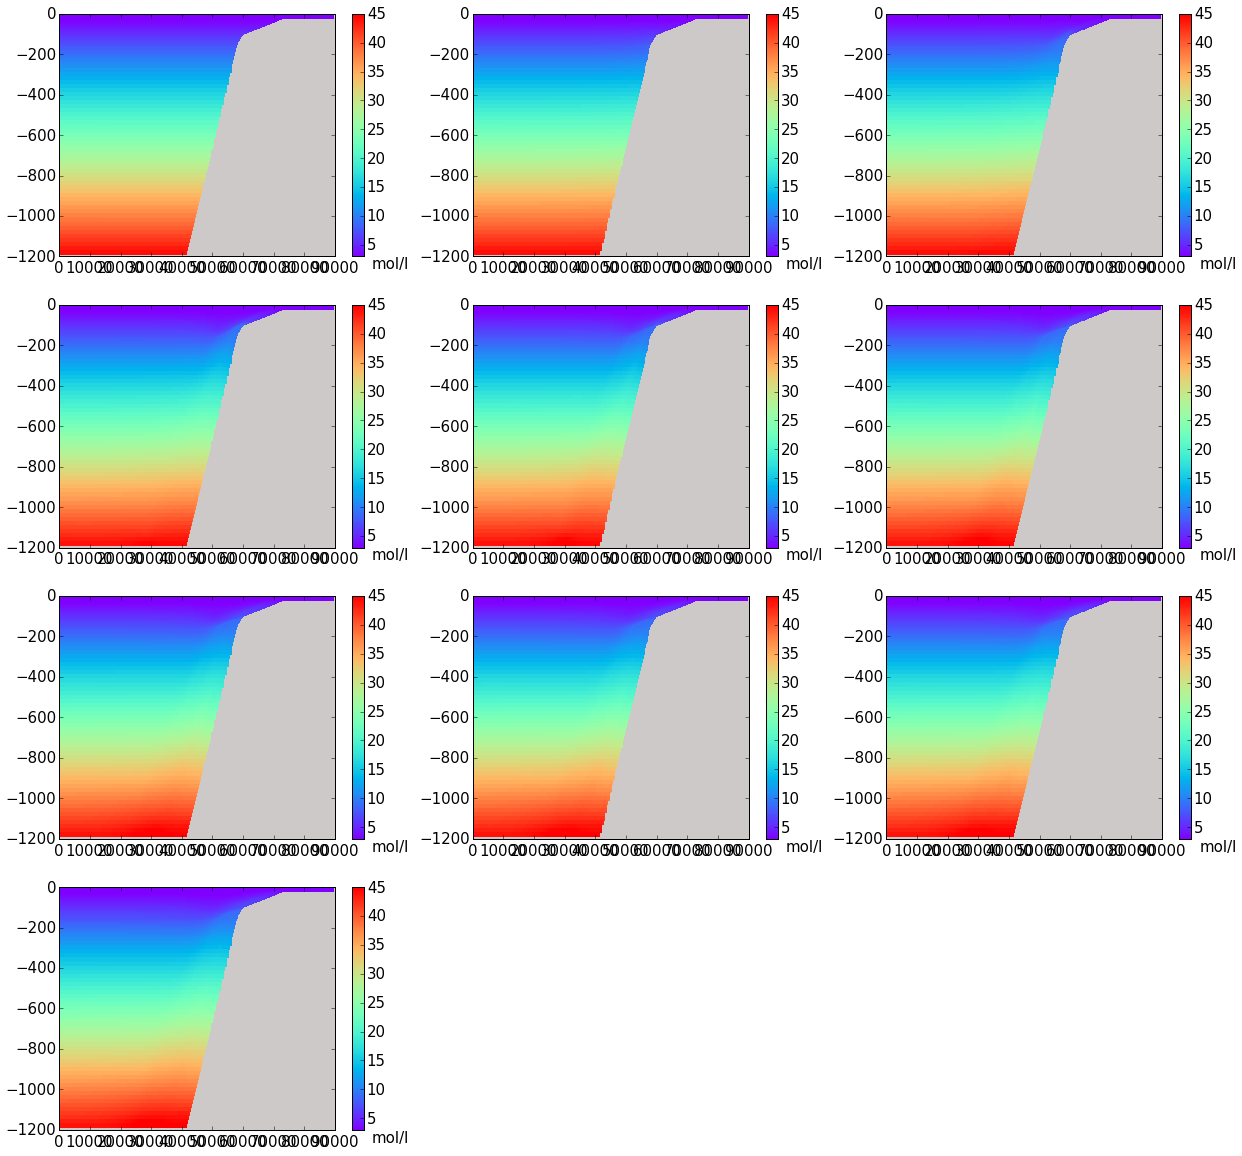

In [28]:
trac = getField(filename3, 'Tr1')

plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        Trmask=np.ma.array(trac[tt,:,:,:],mask=MASKhFacC[:,:,:])
       
        fig1=plt.pcolor(yc[:,180],z[:],Trmask[:,:,180],cmap='rainbow')
        
        pl.clim([3, 45])
        
        cb = plt.colorbar()
        
        cb.set_label('mol/l', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
        
       

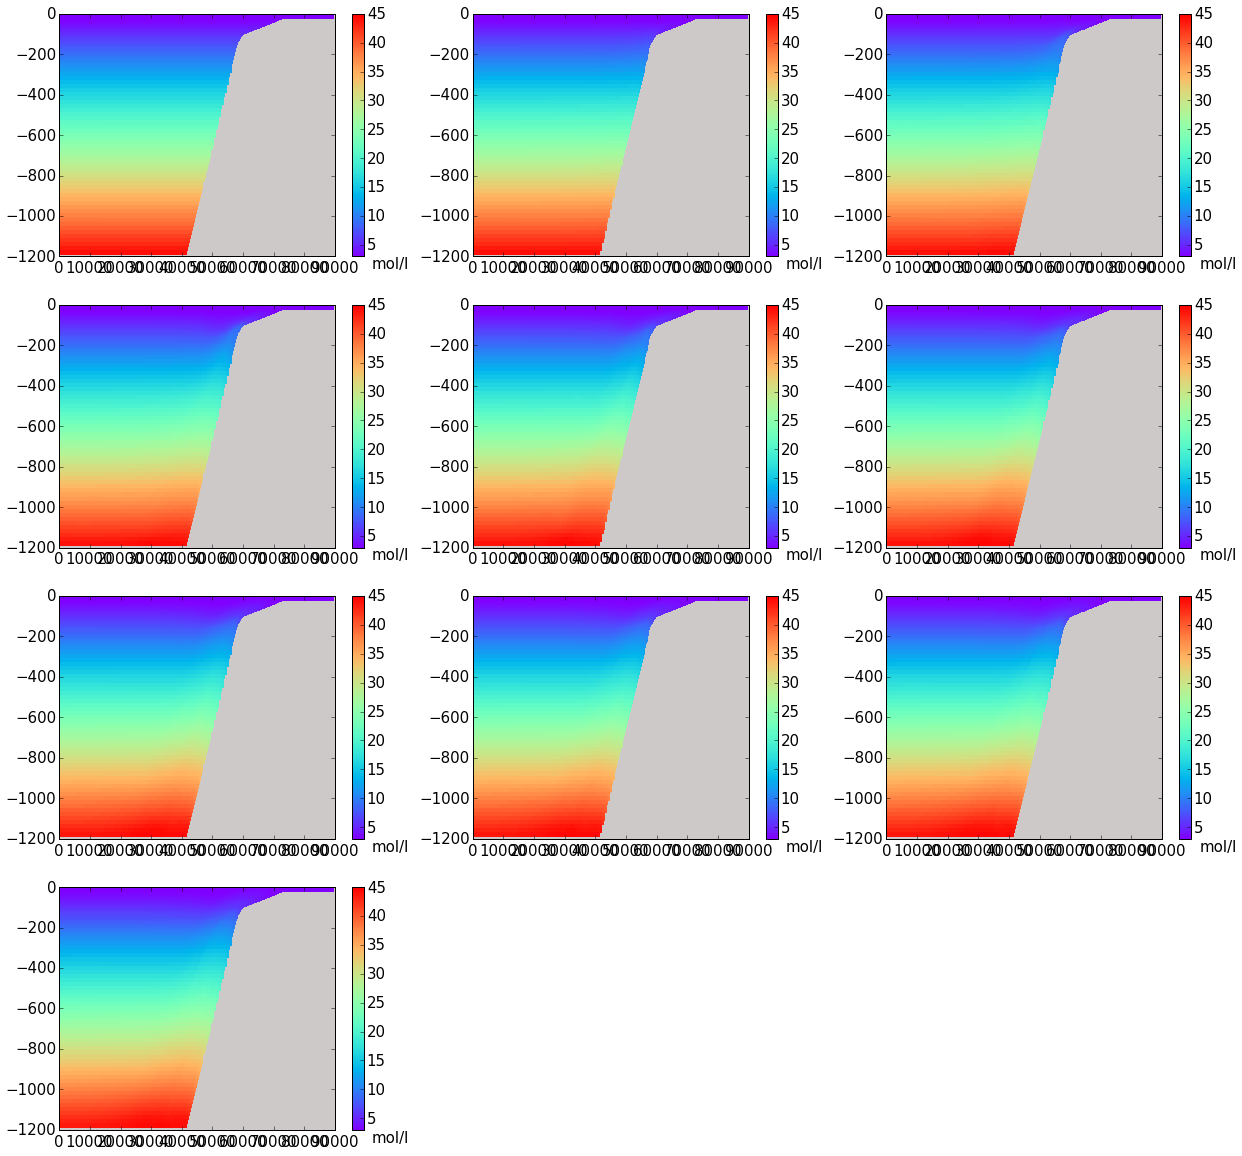

In [29]:
trac = getField(filename3, 'Tr2')

plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        Trmask=np.ma.array(trac[tt,:,:,:],mask=MASKhFacC[:,:,:])
       
        fig1=plt.pcolor(yc[:,180],z[:],Trmask[:,:,180],cmap='rainbow')
        
        pl.clim([3, 45])
        
        cb = plt.colorbar()
        
        cb.set_label('mol/l', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
        
       

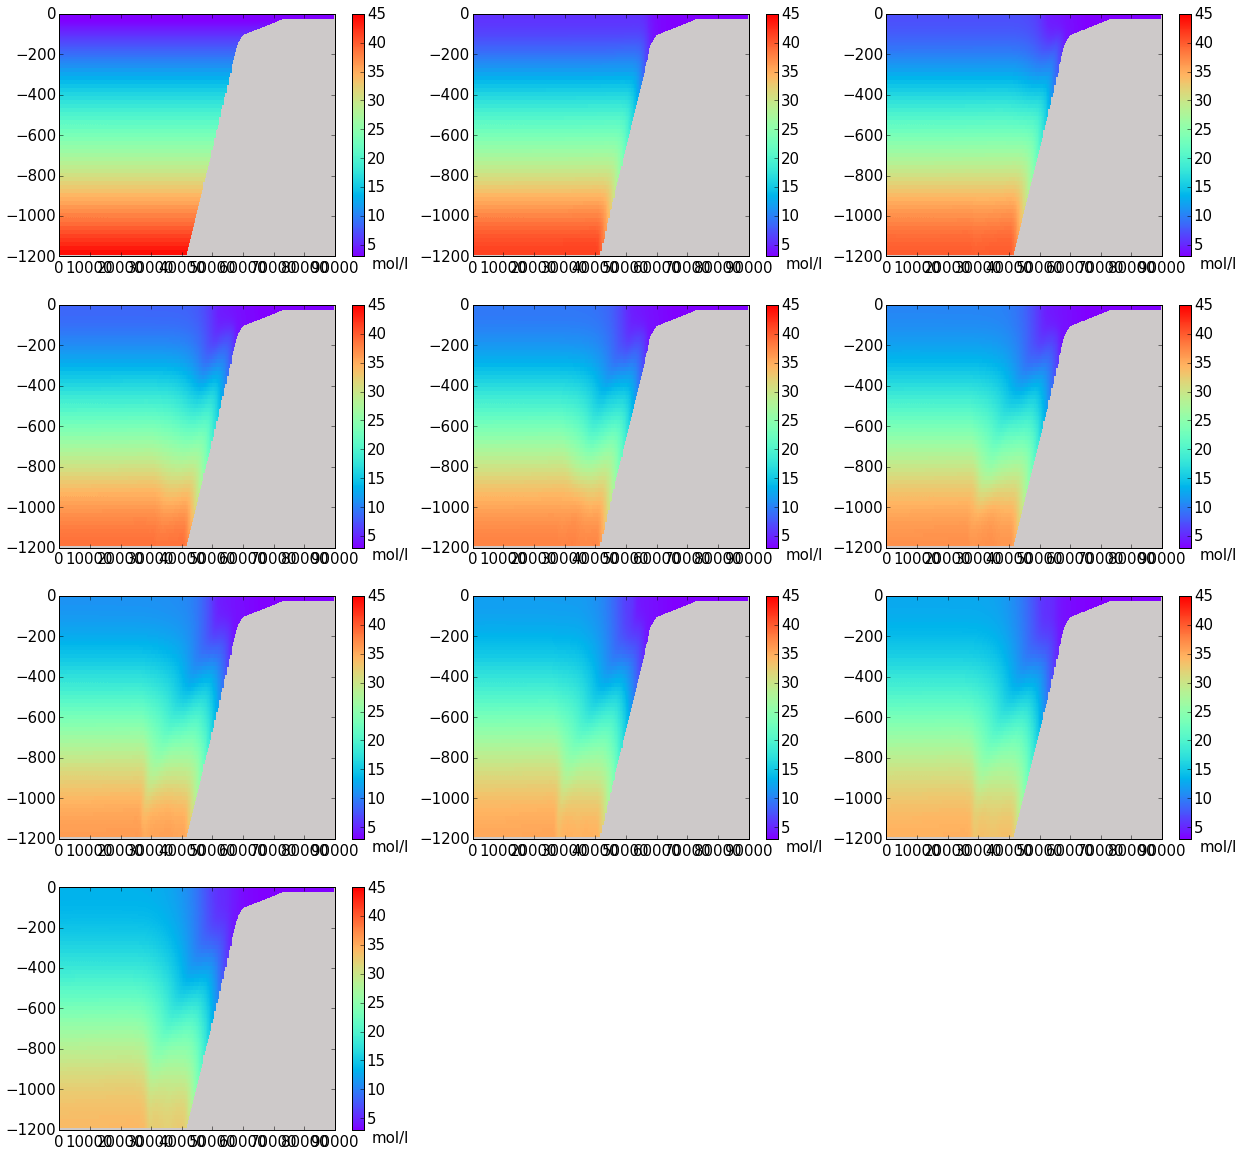

In [30]:
trac = getField(filename3, 'Tr3')

plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        Trmask=np.ma.array(trac[tt,:,:,:],mask=MASKhFacC[:,:,:])
       
        fig1=plt.pcolor(yc[:,180],z[:],Trmask[:,:,180],cmap='rainbow')
        
        pl.clim([3, 45])
        
        cb = plt.colorbar()
        
        cb.set_label('mol/l', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
        

Velocity components - other views

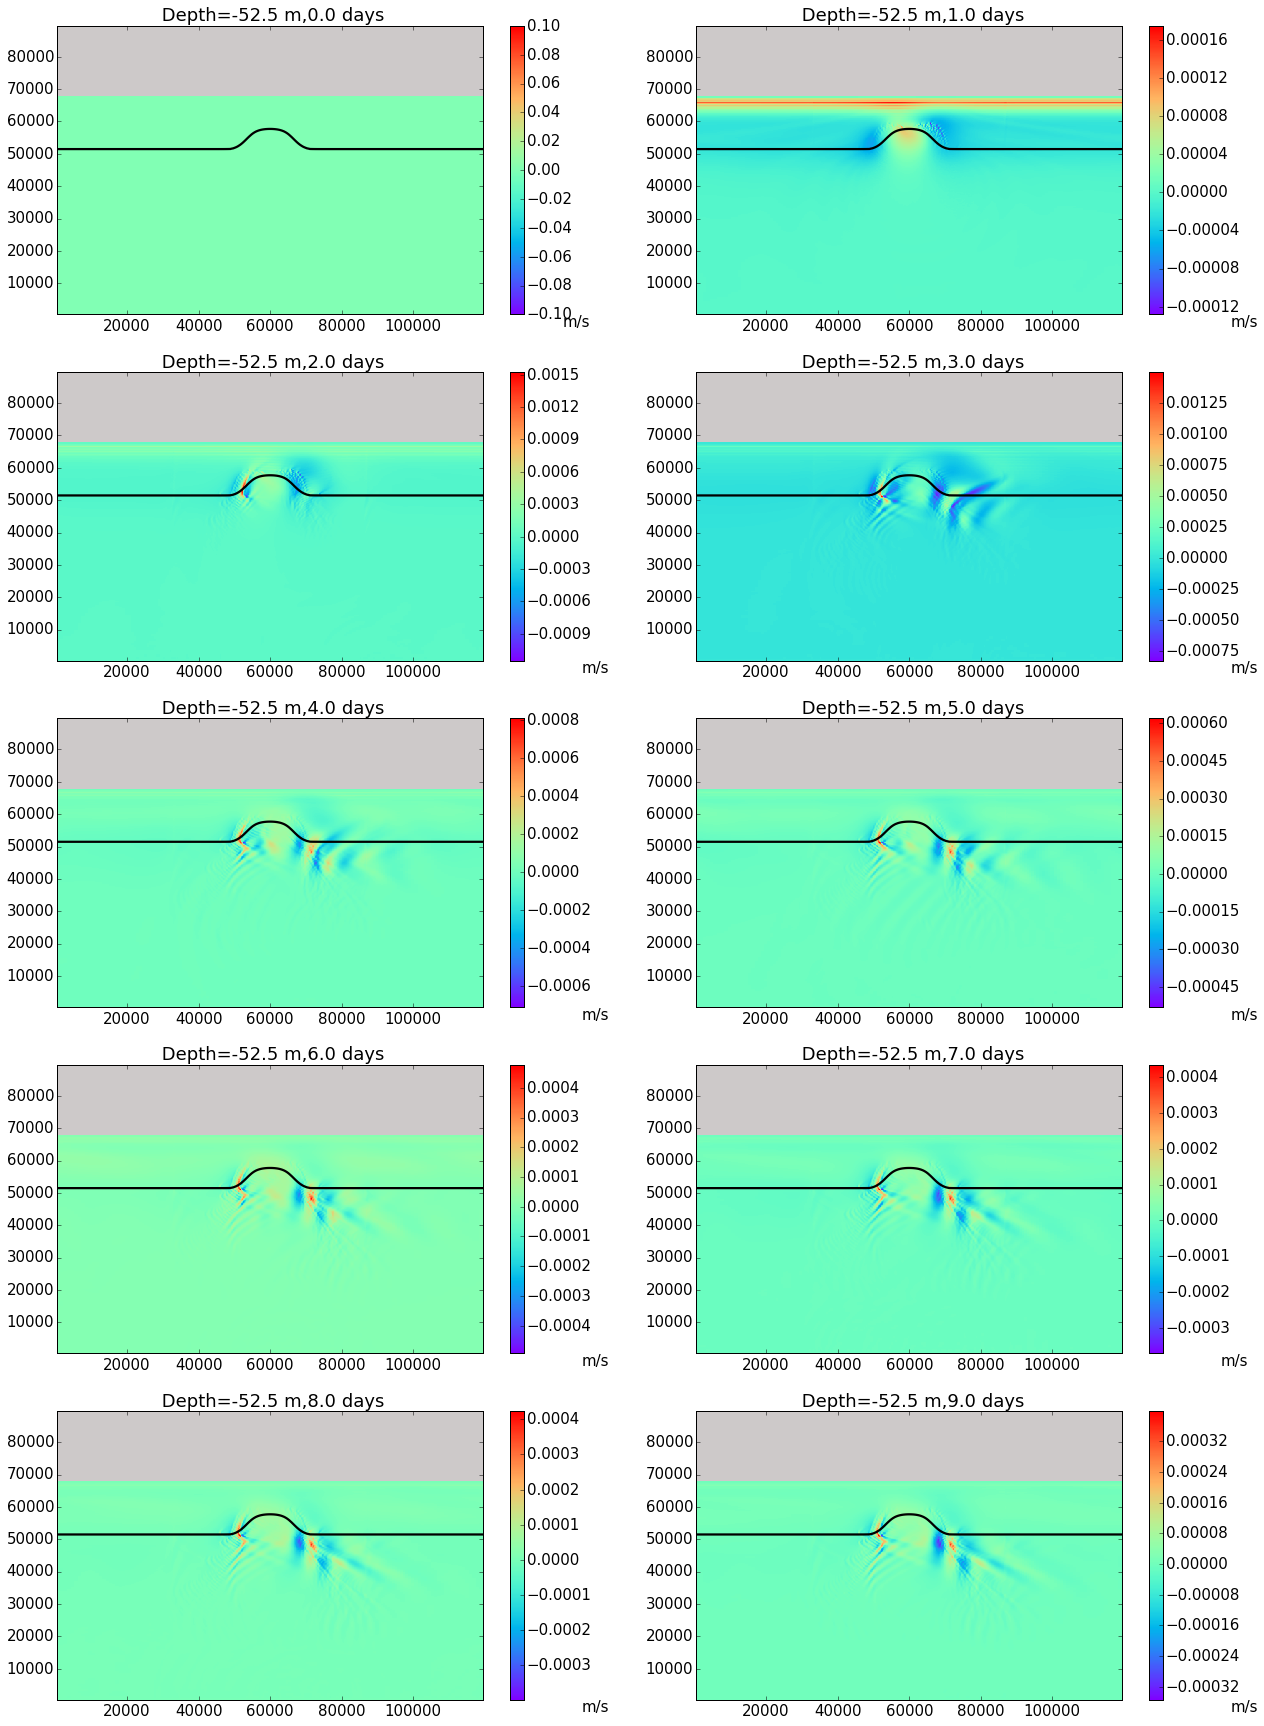

In [31]:
trac = getField(filename, 'W')

plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,30))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(5,2,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        CS = plt.contour(xc,yc,bathy,[150],colors='k',linewidths=[2.25] )
        Trmask=np.ma.array(trac[tt,:,:,:],mask=MASKhFacC[:,:,:])
       
        fig1=plt.pcolor(xc[:,:],yc[:,:],Trmask[10,:,:],cmap='rainbow')
        
        #pl.clim([0, 0.4])
        
        cb = plt.colorbar()
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        
        plt.title(" Depth=%1.1f m,%1.1f days " % (z[10],tt/2.0))
       
            
        kk=kk+1

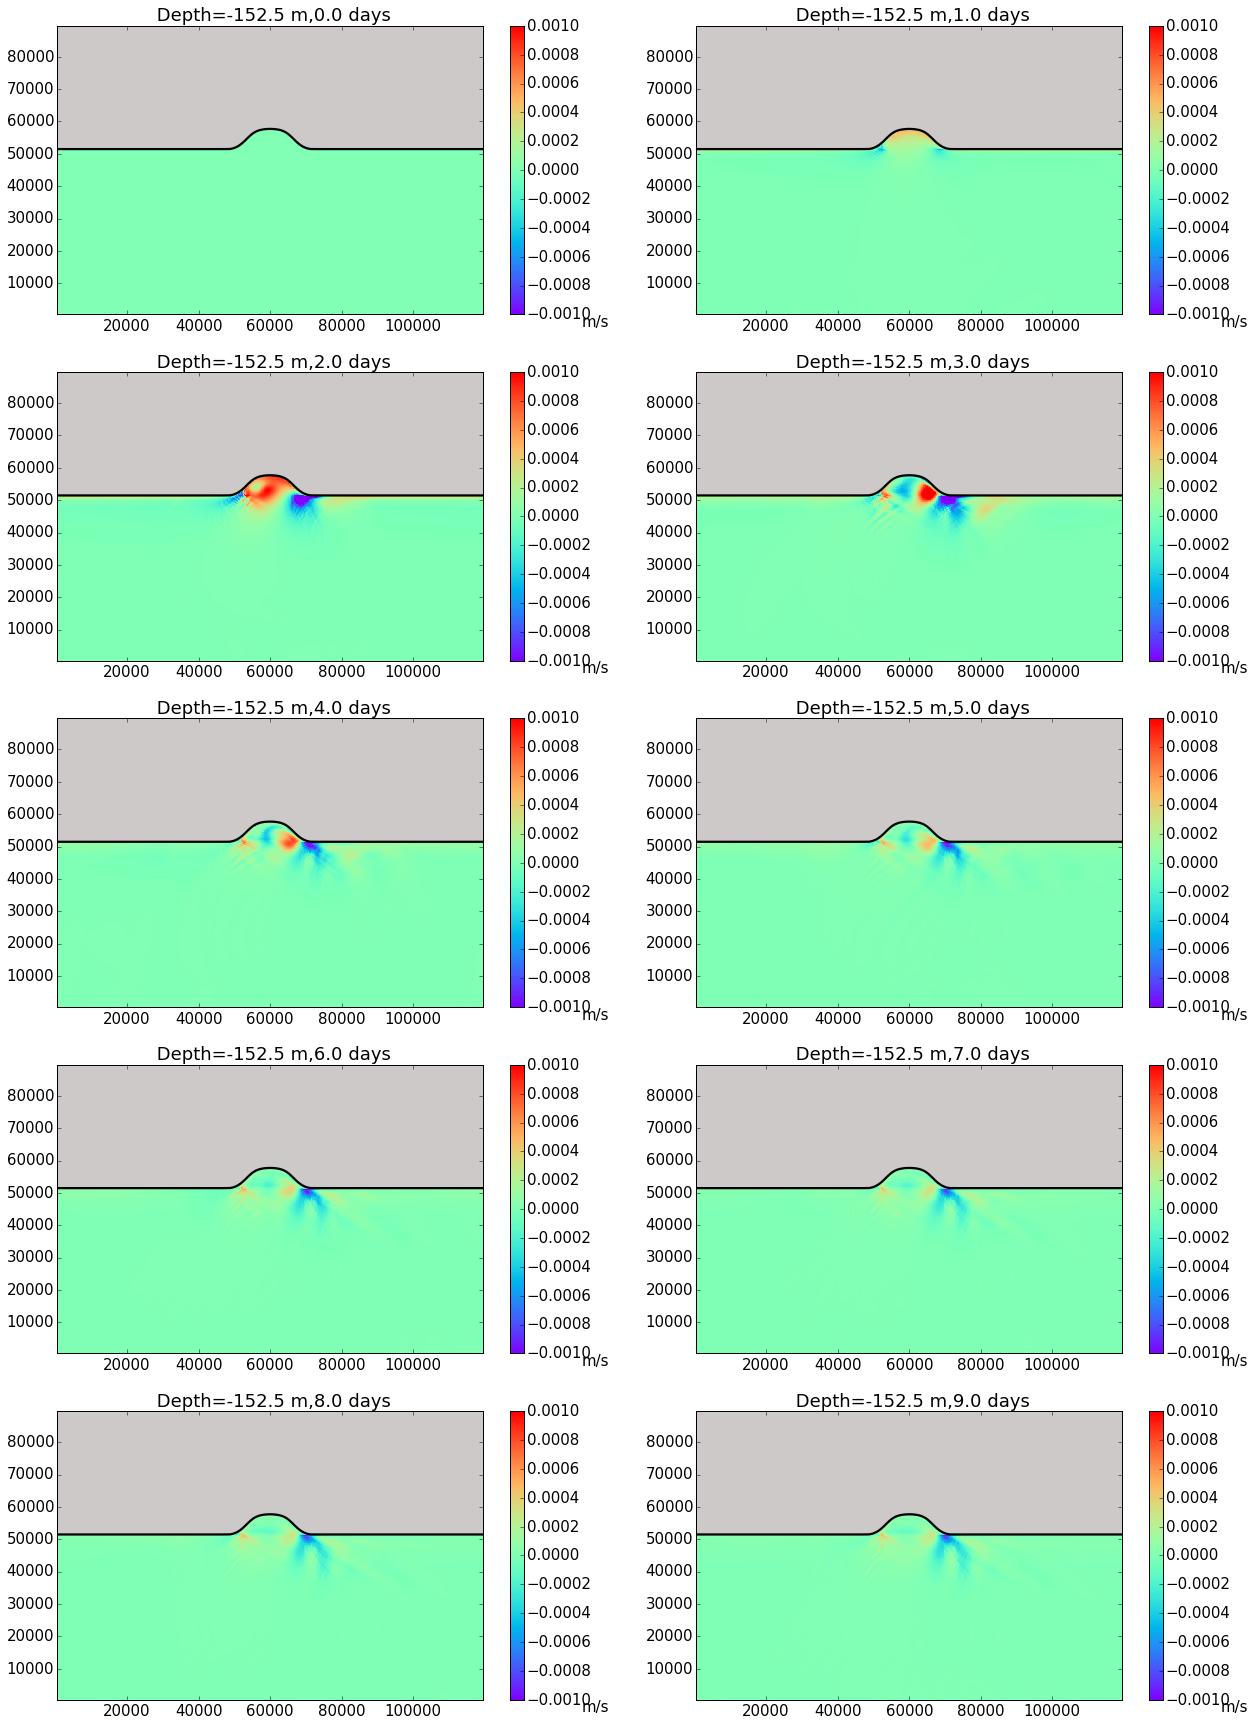

In [32]:
trac = getField(filename, 'W')

plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,30))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(5,2,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        CS = plt.contour(xc,yc,bathy,[150],colors='k',linewidths=[2.25] )
        Trmask=np.ma.array(trac[tt,:,:,:],mask=MASKhFacC[:,:,:])
       
        fig1=plt.pcolor(xc[:,:],yc[:,:],Trmask[30,:,:],cmap='rainbow')
        
        pl.clim([-0.001, 0.001])
        
        cb = plt.colorbar()
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        plt.title(" Depth=%1.1f m,%1.1f days " % (z[30],tt/2.0))
        
       
            
        kk=kk+1
        

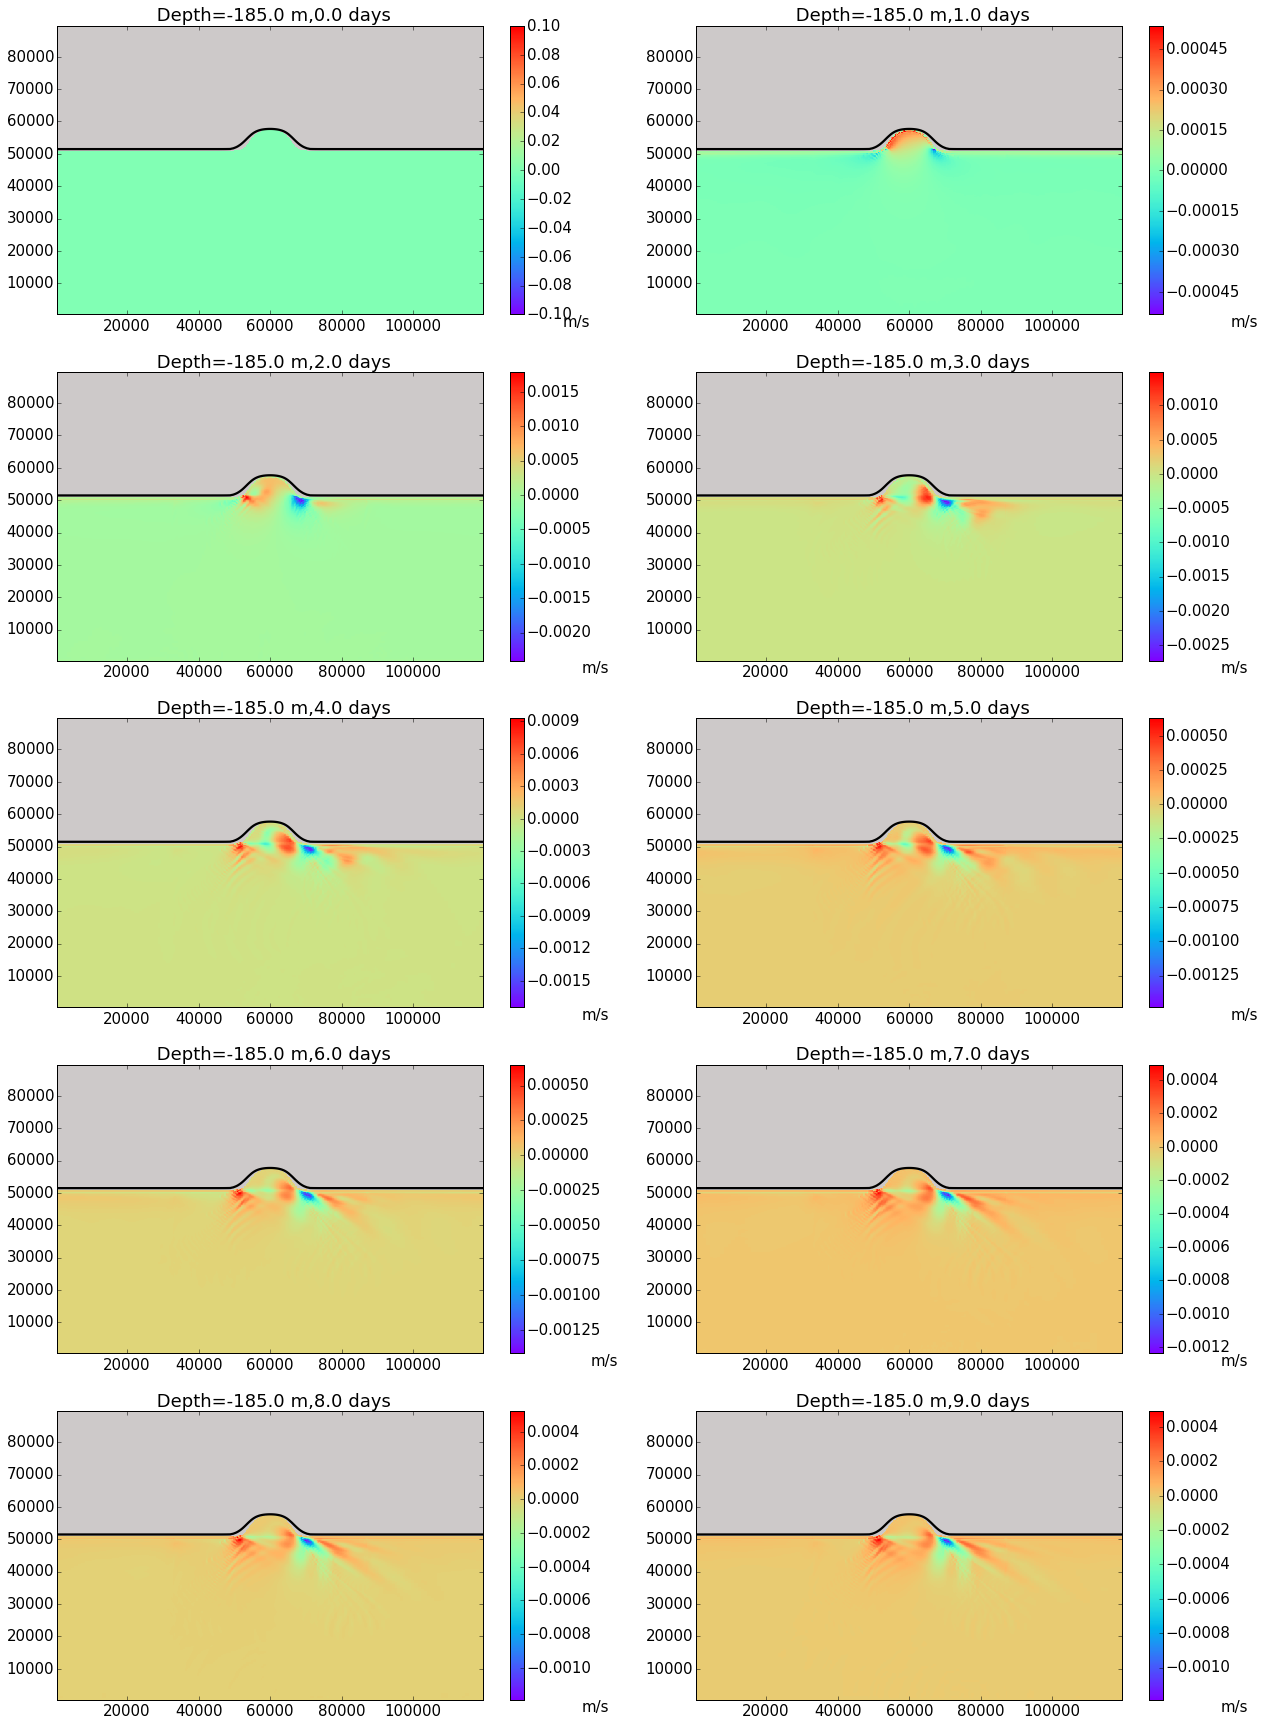

In [33]:
trac = getField(filename, 'W')

plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,30))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(5,2,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        CS = plt.contour(xc,yc,bathy,[150],colors='k',linewidths=[2.25] )
        Trmask=np.ma.array(trac[tt,:,:,:],mask=MASKhFacC[:,:,:])
       
        fig1=plt.pcolor(xc[:,:],yc[:,:],Trmask[35,:,:],cmap='rainbow')
        
        #pl.clim([0, 0.4])
        
        cb = plt.colorbar()
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        plt.title(" Depth=%1.1f m,%1.1f days " % (z[35],tt/2.0))
        
       
            
        kk=kk+1

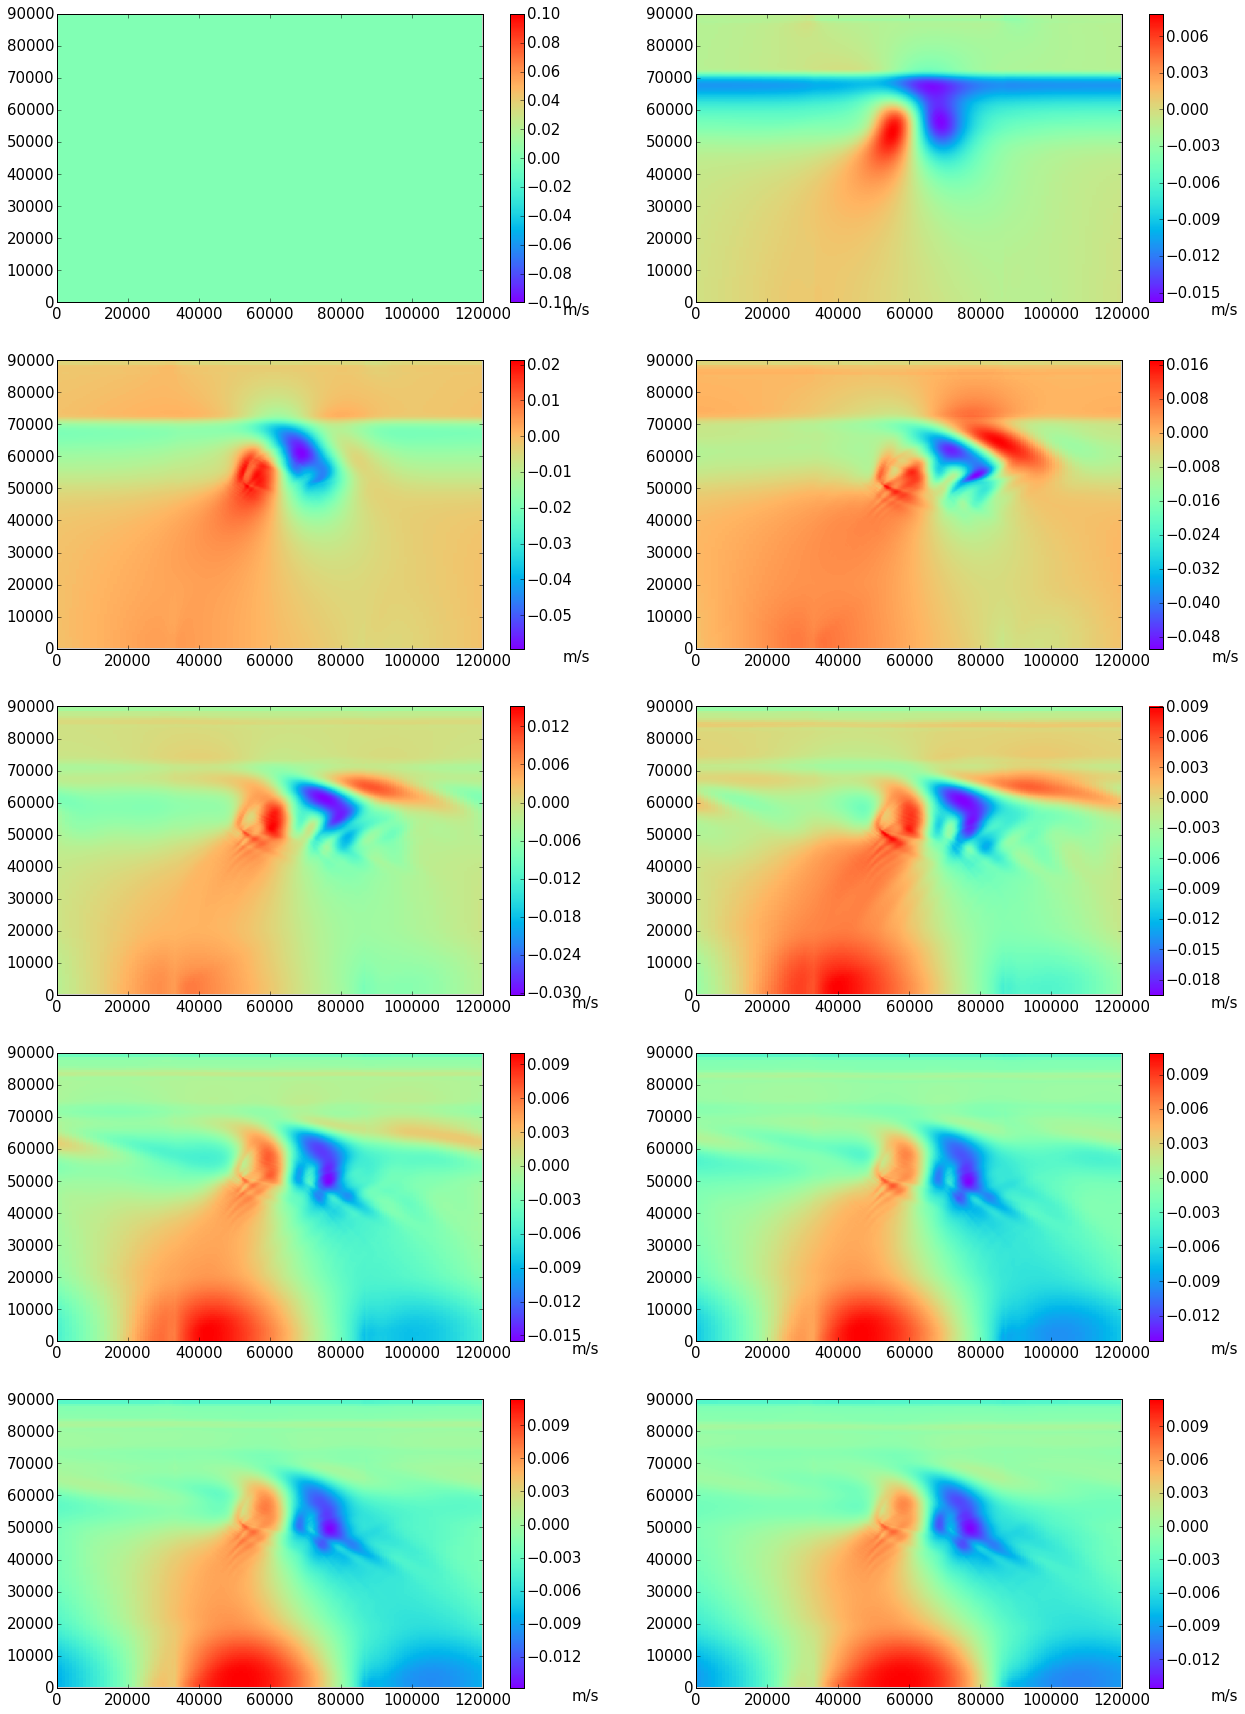

In [34]:
trac = getField(filename, 'V')

plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,30))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(5,2,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        Trmask=np.ma.array(trac[tt,:,:,:],mask=MASKhFacC[:,:,:])
       
        fig1=plt.pcolor(xc[:,:],yc[:,:],Trmask[1,:,:],cmap='rainbow')
        
        #pl.clim([0, 0.4])
        
        cb = plt.colorbar()
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1

52100.0


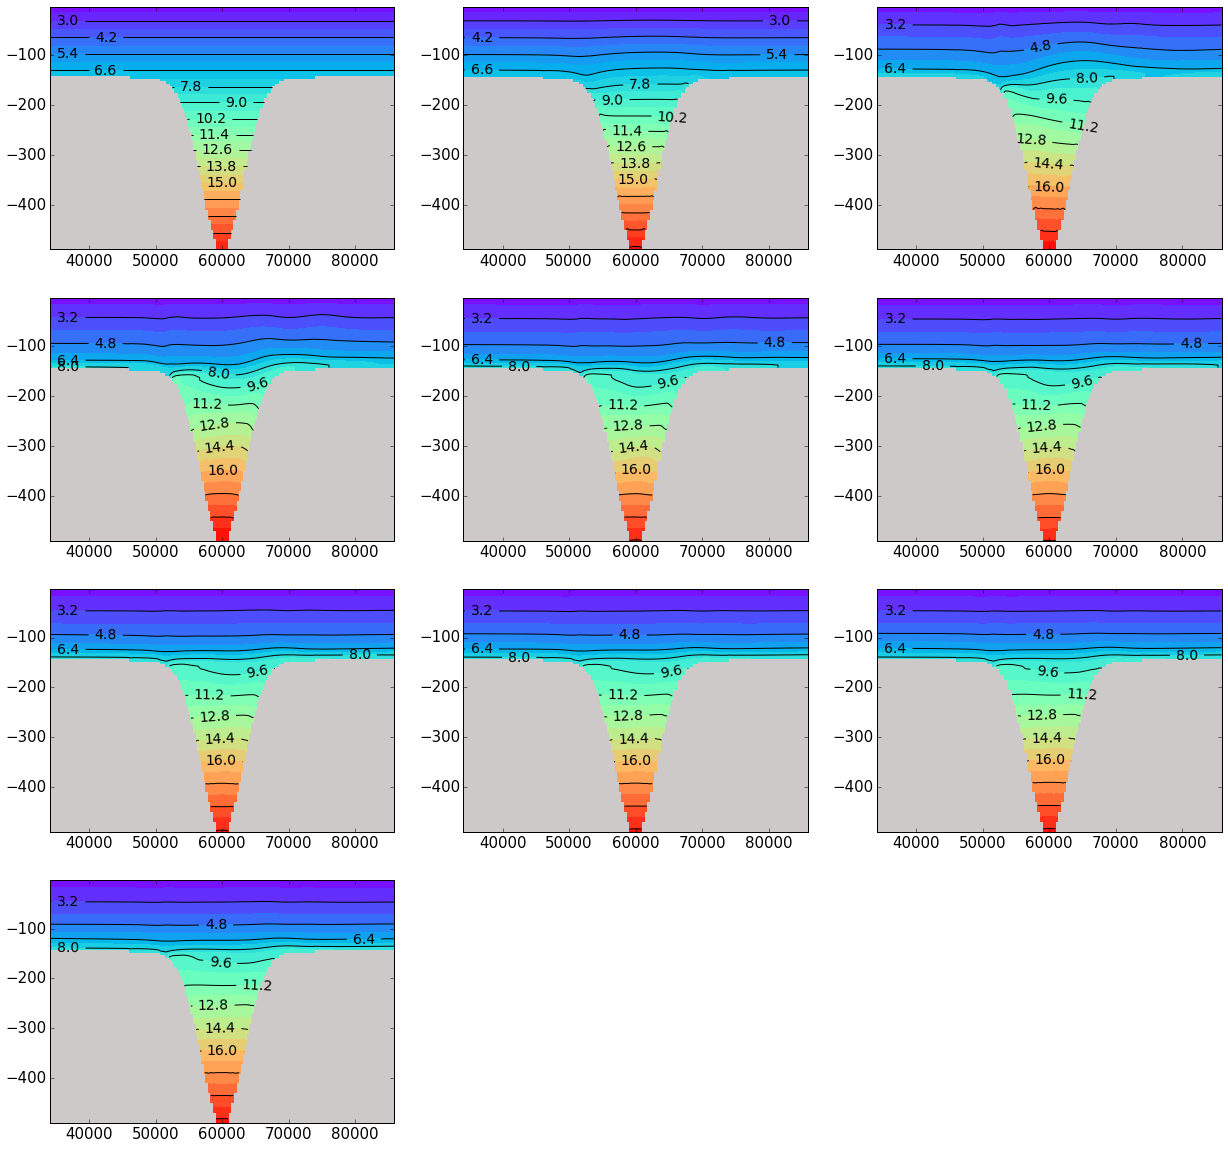

In [35]:
trac = getField(filename3, 'Tr1')
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        
        Trmask=np.ma.array(trac[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        CS=plt.contourf(xc[200,50:-50],z[:-35],Trmask[:-35,200,50:-50],30,cmap='rainbow')
        #plt.clim([9, 14])
        #cb = plt.colorbar()
        
        CS2 = plt.contour(CS, levels=CS.levels[::2],
                        colors = 'k',
                        hold='on')
        
        plt.clabel(CS2, fmt = '%2.1f', colors = 'k', fontsize=14)

        
        
        cb.set_label('mol/l', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
print(yc[200,0])  

52100.0


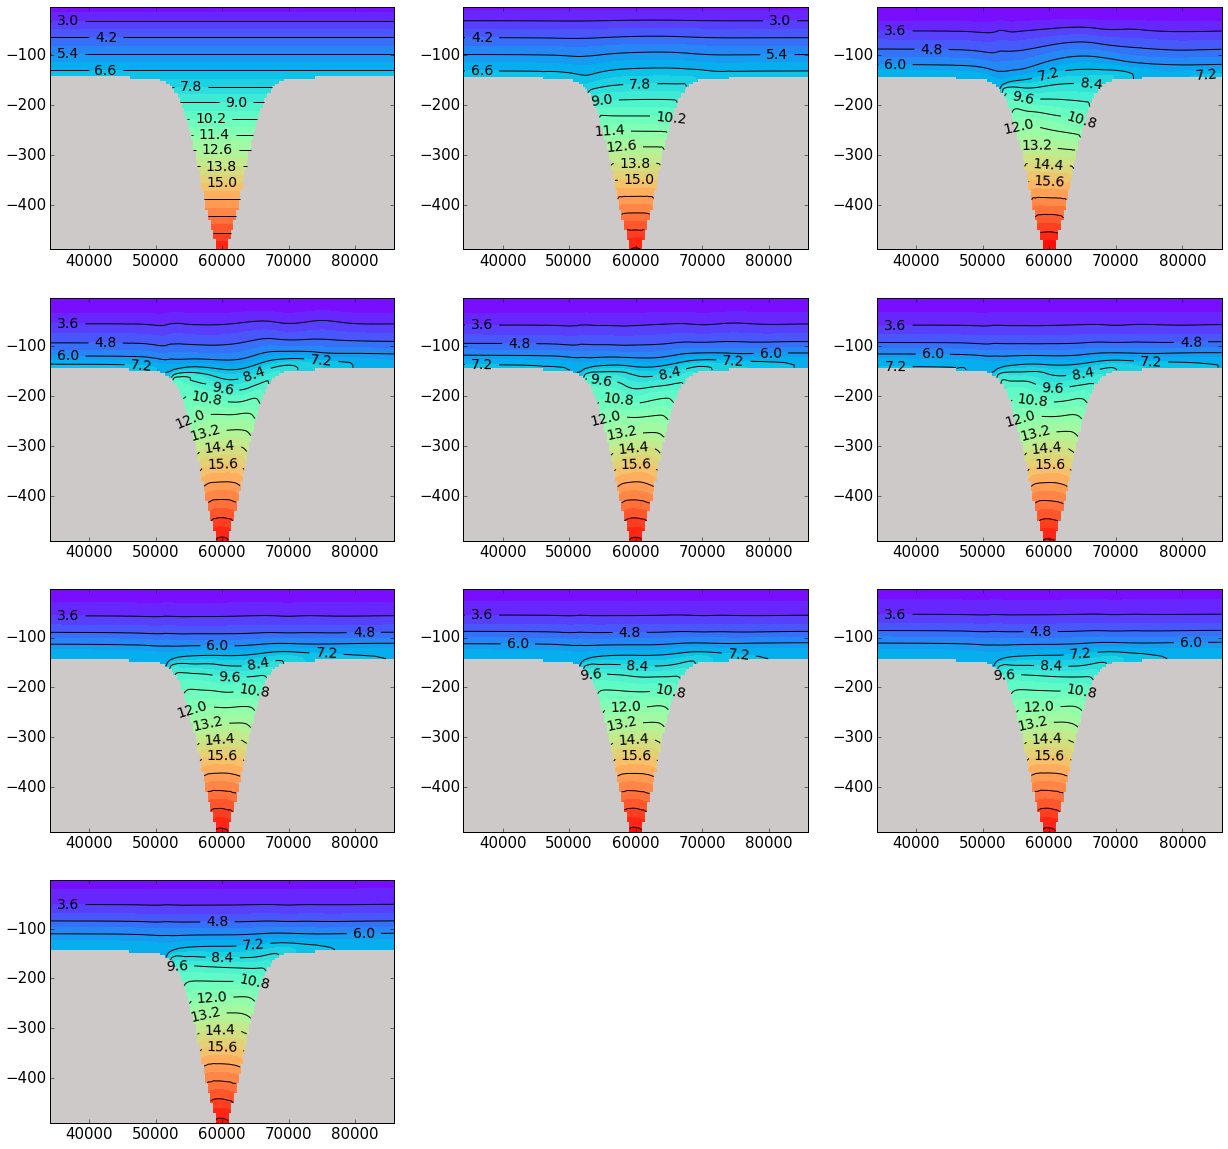

In [36]:
trac = getField(filename3, 'Tr2')
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        
        Trmask=np.ma.array(trac[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        CS=plt.contourf(xc[200,50:-50],z[:-35],Trmask[:-35,200,50:-50],30,cmap='rainbow')
        #plt.clim([9, 14])
        #cb = plt.colorbar()
        
        CS2 = plt.contour(CS, levels=CS.levels[::2],
                        colors = 'k',
                        hold='on')
        
        plt.clabel(CS2, fmt = '%2.1f', colors = 'k', fontsize=14)

        
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
print(yc[200,0])  

52100.0


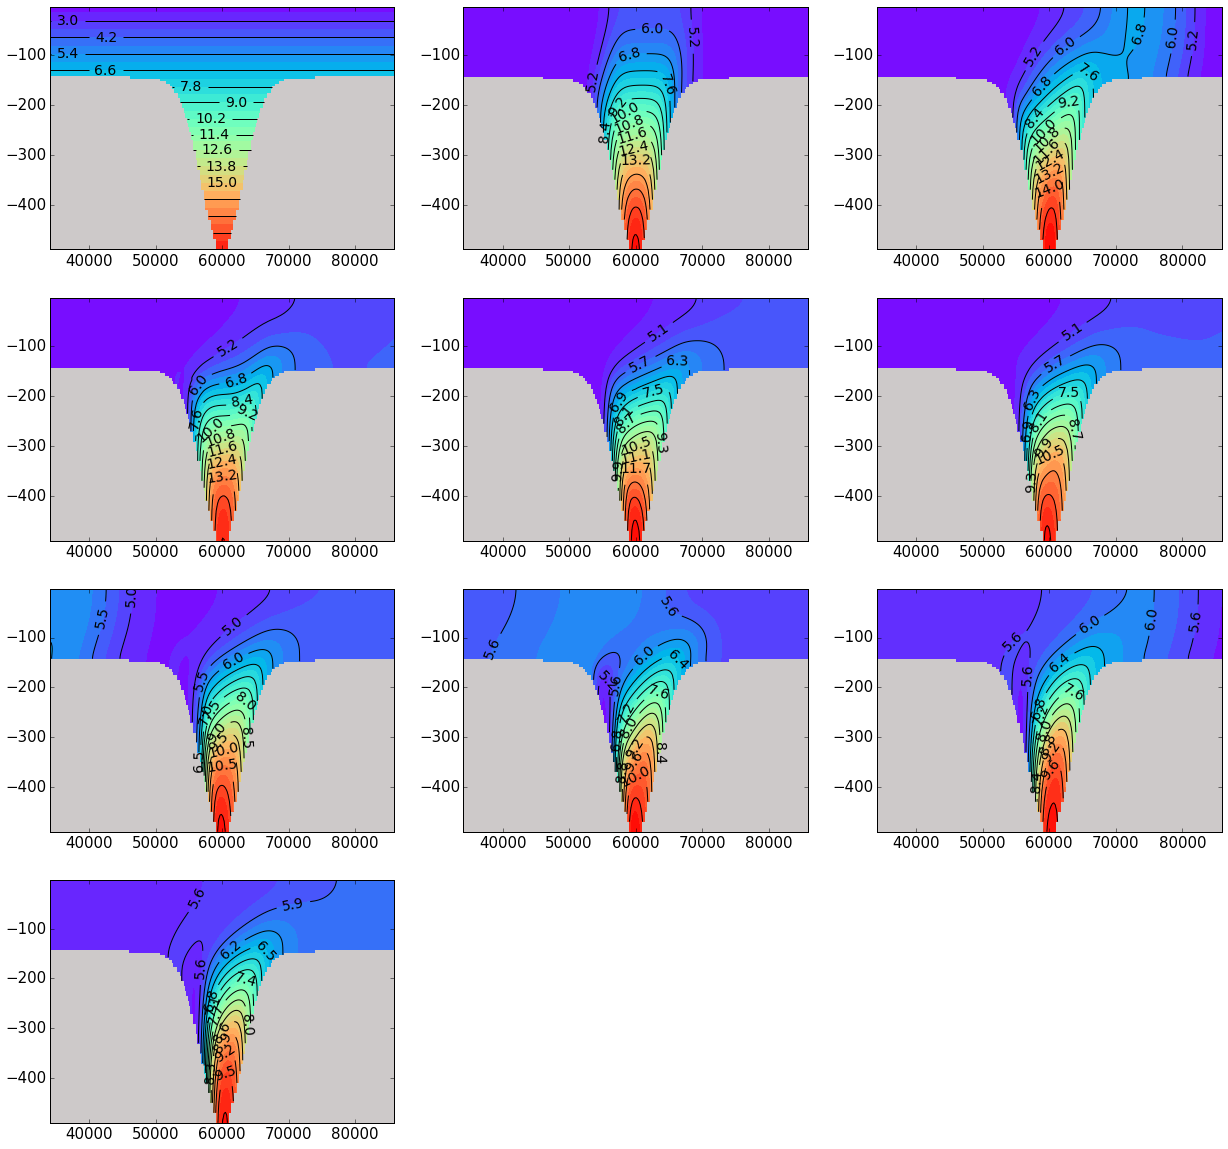

In [37]:
trac = getField(filename3, 'Tr3')
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        
        Trmask=np.ma.array(trac[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        CS=plt.contourf(xc[200,50:-50],z[:-35],Trmask[:-35,200,50:-50],30,cmap='rainbow')
        #plt.clim([9, 14])
        #cb = plt.colorbar()
        
        CS2 = plt.contour(CS, levels=CS.levels[::2],
                        colors = 'k',
                        hold='on')
        
        plt.clabel(CS2, fmt = '%2.1f', colors = 'k', fontsize=14)

        
        
        cb.set_label('mol/l', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
print(yc[200,0])  

In [38]:
filename3b='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run12/ptracers.0000000000.glob.nc'



In [39]:
filenameb='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run12/state.0000000000.glob.nc'




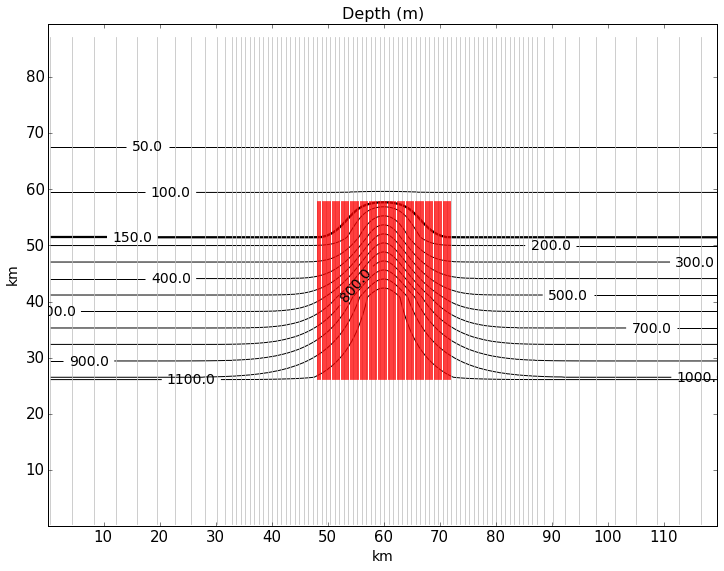

In [40]:
bathy = getField(filename2, 'Depth')

plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(12,9))

plt.plot(xc[::4,::4],yc[::4,::4],linewidth=0.75, linestyle='-', color='0.75')

plt.plot(xc[70:-130,120:-120],yc[70:-130,120:-120],linewidth=0.75, linestyle='-', color='r')


lev = range(200,1200,100)

levels = [50,100,150]+lev

CS = plt.contour(xc,yc,bathy,levels,colors='k',linewidths=[1,1,2.25,1,1,1,1,1,1,1,1,1,1] )

plt.clabel(CS, 
           inline=1,
          fmt='%1.1f',
           fontsize=14)



plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

plt.xlabel('km',fontsize=14)
plt.ylabel('km',fontsize=14)

plt.title('Depth (m)',fontsize=16)


#plt.savefig('AcrossShoreLines.png', bbox_inches='tight')
#plt.savefig('AcrossShoreLines.pdf', bbox_inches='tight')




In [41]:
filenameb='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run12/state.0000000000.glob.nc'
filenamec='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run14/state.0000000000.glob.nc'
filename3b='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run12/ptracers.0000000000.glob.nc'

trac = getField(filename3,'Tr1')
tracb = getField(filename3b, 'Tr1')
W = getField(filename, 'W')
Wb = getField(filenameb, 'W')
Wc = getField(filenamec, 'W')

rA = getField(filename2, 'rA')



(1386089.3695082525, 'Conc*m^3/s')


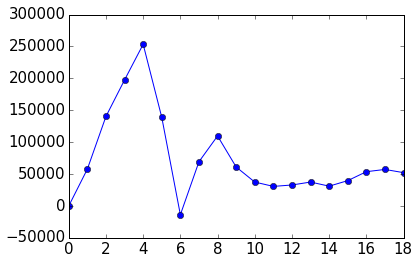

In [42]:
SB = 30 

VertTransb = np.zeros(19)

for time in range(0,19,1):
    VertTransb[time] = np.sum(np.sum(rA[70:-130,120:-120]*Wb[time,SB,70:-130,120:-120]*tracb[time,SB,70:-130,120:-120]))
    
TotalVertTransb = sum(VertTransb)
print (TotalVertTransb,'Conc*m^3/s')

plt.plot(range(0,19,1),VertTransb,'bo-')


(1321757.0019288047, 'Conc*m^3/s')


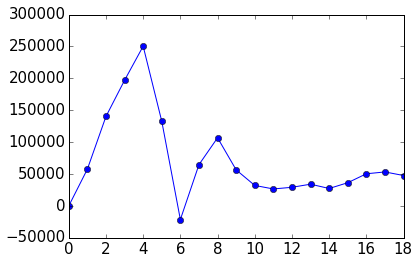

In [43]:
SB = 30 

VertTrans = np.zeros(19)

for time in range(0,19,1):
    VertTrans[time] = np.sum(np.sum(rA[70:-130,120:-120]*W[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
    
TotalVertTrans = sum(VertTrans)
print (TotalVertTrans,'Conc*m^3/s')

plt.plot(range(0,19,1),VertTrans,'bo-')


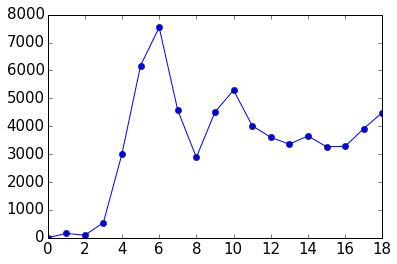

In [44]:
plt.plot(range(0,19,1),VertTransb-VertTrans,'bo-')


In [45]:
trac = getField(filename3,'Tr2')

SB = 30 

VertTrans2 = np.zeros(19)

for time in range(0,19,1):
    VertTrans2[time] = np.sum(np.sum(rA[70:-130,120:-120]*W[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
    
TotalVertTrans2 = sum(VertTrans2)

trac = getField(filename3,'Tr3')

SB = 30 

VertTrans3 = np.zeros(19)

for time in range(0,19,1):
    VertTrans3[time] = np.sum(np.sum(rA[70:-130,120:-120]*W[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
    
TotalVertTrans3 = sum(VertTrans3)



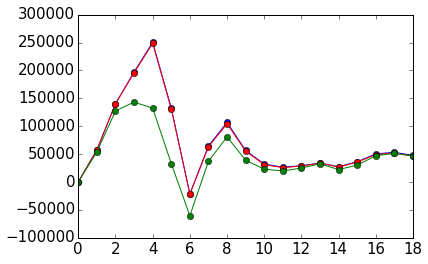

In [46]:
plt.plot(range(0,19,1),VertTrans,'bo-')
plt.plot(range(0,19,1),VertTrans2,'ro-')
plt.plot(range(0,19,1),VertTrans3,'go-')



In [47]:
trac = getField(filename3b,'Tr2')

SB = 30 

VertTrans2b = np.zeros(19)

for time in range(0,19,1):
    VertTrans2b[time] = np.sum(np.sum(rA[70:-130,120:-120]*Wb[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
    
TotalVertTrans2b = sum(VertTrans2b)

trac = getField(filename3b,'Tr3')

SB = 30 

VertTrans3b = np.zeros(19)

for time in range(0,19,1):
    VertTrans3b[time] = np.sum(np.sum(rA[70:-130,120:-120]*Wb[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
    
TotalVertTrans3b = sum(VertTrans3b)


In [48]:
filenamec3='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run14/ptracers.0000000000.glob.nc'

trac = getField(filenamec3,'Tr1')

SB = 30 

VertTransc = np.zeros(19)

for time in range(0,19,1):
    VertTransc[time] = np.sum(np.sum(rA[70:-130,120:-120]*Wc[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
    
TotalVertTransc = sum(VertTransc)

trac = getField(filenamec3,'Tr2')

SB = 30 

VertTrans2c = np.zeros(19)

for time in range(0,19,1):
    VertTrans2c[time] = np.sum(np.sum(rA[70:-130,120:-120]*Wc[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
    
TotalVertTrans2c = sum(VertTrans2c)

trac = getField(filenamec3,'Tr3')

SB = 30 

VertTrans3c = np.zeros(19)

for time in range(0,19,1):
    VertTrans3c[time] = np.sum(np.sum(rA[70:-130,120:-120]*Wc[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
    
TotalVertTrans3c = sum(VertTrans3c)


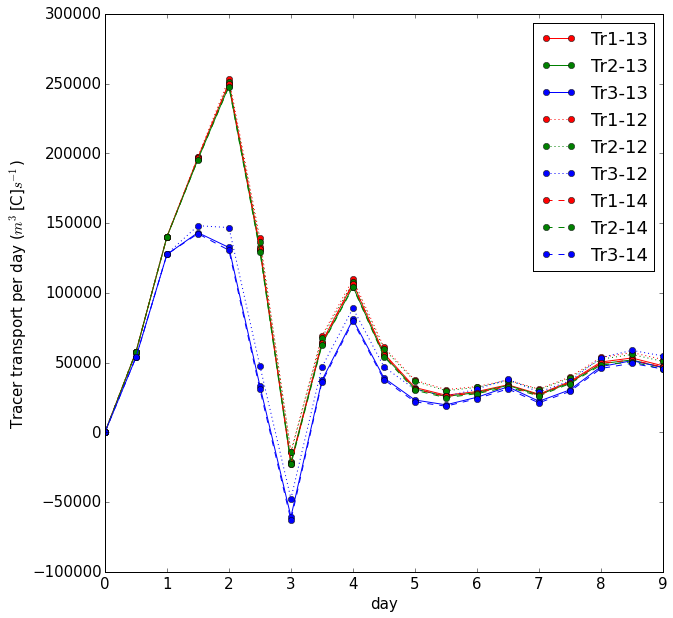

In [49]:
fig45=plt.figure(figsize=(10,10))

Tr1run13=plt.plot(np.arange(0,9.5,0.5),VertTrans,'ro-',label='Tr1-13')
Tr2run13=plt.plot(np.arange(0,9.5,0.5),VertTrans2,'go-',label='Tr2-13')
Tr3run13=plt.plot(np.arange(0,9.5,0.5),VertTrans3,'bo-',label='Tr3-13')
Tr1run12=plt.plot(np.arange(0,9.5,0.5),VertTransb,'ro:',label='Tr1-12')
Tr2run12=plt.plot(np.arange(0,9.5,0.5),VertTrans2b,'go:',label='Tr2-12')
Tr3run12=plt.plot(np.arange(0,9.5,0.5),VertTrans3b,'bo:',label='Tr3-12')
Tr1run14=plt.plot(np.arange(0,9.5,0.5),VertTransc,'ro--',label='Tr1-14')
Tr2run14=plt.plot(np.arange(0,9.5,0.5),VertTrans2c,'go--',label='Tr2-14')
Tr3run14=plt.plot(np.arange(0,9.5,0.5),VertTrans3c,'bo--',label='Tr3-14')
plt.ylabel('Tracer transport per day ($m^3$[C]$s^{-1}$)')
plt.xlabel('day')
plt.legend()
